<h1 style="color:red"; font-size:30px">KNOWLEDGE EXTRACTION</h1>

<p>The main goal of our project is to make a <b>comparison</b>, from a semantic poin of view, between the <b>Fabrizio De André music album</b>, with the title <b>"Non al denaro non all'amore né al cielo"</b>, and the <b>Edgar Lee Masters' Spoon River anthology poems</b>.</p> 
<p>Fabrizio De André for its fifth album, published in 1971, decided to give a personal interpretation of nine of the Spoon River's poems, developing in particular the <b>envy</b> and the <b>science</b> topics.<br>
During an interview made by Fernanda Pivano, who translated and reviewed together with Cesare Pavese the first italian edition of the Spoon River's anthology, Fabrizio De André said:<br>
   <em>“Spoon River l’ho letto da ragazzo, avrò avuto 18 anni. Mi era piaciuto [...] forse perché in questi personaggi si trova qualcosa di me. Poi mi è capitato di rileggerlo, due anni fa [1969, ndr], e mi sono reso conto che non era invecchiato per niente. Soprattutto mi ha colpito un fatto: nella vita, si è costretti alla competizione, magari si è costretti a pensare il falso o a non essere sinceri, nella morte, invece, i personaggi di Spoon River si esprimono con estrema sincerità, perché non hanno più da aspettarsi niente, non hanno più niente da pensare. Così parlano come da vivi non sono mai stati capaci di fare”.</em>
<p>Our main research questions are: <br>
<b><em>"Is it possible to extract in an automatic way the main themes treated in each of the nine Spoon River poems and in the De André corresponding songs?"<br>
"What are the differences between them?" <br> "Are the results that we gather from this topic extraction in line with the personal interpretation of De André about his own music album?"</em></b></p>

<h2 style="color:red">Methodology</h2>

<p>To accomplish this knowledge extraction task we decide to use <b><a href="https://maartengr.github.io/BERTopic/index.html">BERTopic</a></b>, which is a a topic modeling technique that leverages BERT embeddings and <a href="https://maartengr.github.io/BERTopic/api/ctfidf.html">c-TF-IDF</a> to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.</p>

<p>We decided to use as corpus for our research the entire Spoon River anthology, consisting of 244 poems in the last 1916 edition, and due to its reduced dimension we found more interesting to use an <a href="https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html">embedding model</a>, that allowed us to leverage pre-trained embeddings suitable for our use case, and to create topics, even if we had little data available.</p>
<p>We used a general purpose trained model, <b><a href="https://www.sbert.net/docs/pretrained_models.html">all-MiniLM-L6-v2</a></b> in particular, which has been trained on a large and diverse dataset of over 1 billion training pairs and offers good quality and high speed.</p>

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

Then through the method <a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.fit"><code>  fit(documents, embeddings=None, y=None)</code></a> we fitted the trained model on our collection of documents, formed by not the entire poems but single verses. <br> Before using the method <code> fit() </code>, we have pre-processed our corpus removing the punctuation and changing all the characters to lowercase ones through the following functions:

In [9]:
#in this string we put the texts of all the Spoon River Anthology poems

poems='''
  The Hill
  Where are Elmer, Herman, Bert, Tom and Charley,
  The weak of will, the strong of arm, the clown, the boozer, the fighter?
  All, all are sleeping on the hill.
  One passed in a fever,
  One was burned in a mine,
  One was killed in a brawl,
  One died in a jail,
  One fell from a bridge toiling for children and wife--
  All, all are sleeping, sleeping, sleeping on the hill.
  Where are Ella, Kate, Mag, Lizzie and Edith,
  The tender heart, the simple soul, the loud, the proud, the happy one?--
  All, all are sleeping on the hill.
  One died in shameful child-birth,
  One of a thwarted love,
  One at the hands of a brute in a brothel,
  One of a broken pride, in the search for heart's desire;
  One after life in far-away London and Paris
  Was brought to her little space by Ella and Kate and Mag--
  All, all are sleeping, sleeping, sleeping on the hill.
  Where are Uncle Isaac and Aunt Emily,
  And old Towny Kincaid and Sevigne Houghton,
  And Major Walker who had talked
  With venerable men of the revolution?--
  All, all are sleeping on the hill.
  They brought them dead sons from the war,
  And daughters whom life had crushed,
  And their children fatherless, crying--
  All, all are sleeping, sleeping, sleeping on the hill.
  Where is Old Fiddler Jones
  Who played with life all his ninety years,
  Braving the sleet with bared breast,
  Drinking, rioting, thinking neither of wife nor kin,
  Nor gold, nor love, nor heaven?
  Lo! he babbles of the fish-frys of long ago,
  Of the horse-races of long ago at Clary's Grove,
  Of what Abe Lincoln said
  One time at Springfield.
  Hod Putt
  HERE I lie close to the grave
  Of Old Bill Piersol,
  (...)'''


In [10]:
#through a simple split we obtain a list of strings, in which each string is a verse.
verses = poems.split("\n")

In [13]:
import nltk, nltk.tokenize, nltk.corpus, nltk.stem
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet

#lowercase text
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

#remove stopwords
def remove_stopwords(text):
    no_stop = text.split()
    stopwordz = stopwords.words('english')
    for word in no_stop:
        for stopword in stopwordz:
            if word == stopword:
                no_stop.remove(word)
    return ' '.join(no_stop)

#remove punctuation
def strip_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return ' '.join(tokenizer.tokenize(text))

#preprocess text
def preprocess(text):
    lower_text = to_lower(text)
    text_no_stopwords = remove_stopwords(lower_text)
    text_no_punct = strip_punctuation(text_no_stopwords)
    return text_no_punct

#application of the function preprocess(text) to our corpus 
verses_no_punct=[]
for x in verses:
    x_preprocessed=preprocess(x)
    verses_no_punct.append(x_preprocessed)

<p>Then we passed as parameter of the method <code> fit() </code> the list of pre-processed strings containing the verses of the Spoon River poems.</p>

In [ ]:
topic_model.fit(verses_no_punct)

<p>Using the method<a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.get_topic_freq"> <code>topic_model.get_topic_freq(topic=none)</code></a> is possible to obtain the number and the frequence of all the retrieved topics.<br> We have found 88 different topics for the entire Spoon River anthology. It is important to point out that the <code>topic -1</code> represents always the outliers so it can be ignored.</p>

In [7]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,1620
1,0,135
2,1,115
3,2,101
4,3,87
...,...,...
82,83,12
81,84,12
86,85,11
87,86,11


<p>Then we have used also the method <a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.generate_topic_labels"><code>topic_model.generate_topic_labels(nr_words=3, topic_prefix=True, word_length=None, separator='_'</code></a></p> in order to get labels for each generated topic, using a combination of three words.

In [9]:
topic_model.generate_topic_labels(nr_words=3, topic_prefix=True, word_length=None, separator='_')

['-1_the_me_was',
 '0_george_greene_john',
 '1_truth_know_lie',
 '2_eyes_eye_face',
 '3_soul_souls_your',
 '4_spoon_river_spooniad',
 '5_mrs_emily_daisy',
 '6_married_husband_wife',
 '7_court_judge_county',
 '8_money_fortune_dollars',
 '9_house_room_alone',
 '10_hand_hands_sword',
 '11_children_child_birth',
 '12_write_read_books',
 '13_tree_cedar_branches',
 '14_world_power_peace',
 '15_church_congregation_bell',
 '16_wisdom_dreams_youth',
 '17_fell_fall_back',
 '18_life_reasons_live',
 '19_farm_plow_ditch',
 '20_voice_music_song',
 '21_stone_epitaph_stones',
 '22_village_town_galilee',
 '23_republic_democracy_liberty',
 '24_dead_fight_kill',
 '25_wine_drink_drinks',
 '26_strength_pride_grew',
 '27_wings_winged_hawk',
 '28_woven_washed_skirts',
 '29_years_twenty_seventy',
 '30_hill_mountains_hills',
 '31_chicago_peoria_springfield',
 '32_bouquet_blossoms_flower',
 '33_heaven_earth_kingdom',
 '34_sorrow_despair_delight',
 '35_away_ran_lost',
 '36_grave_funeral_graven',
 '37_father_moth

<p>Our intuition has been to use the method <a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.find_topics"><code>find_topics(search_term, top_n=5)</code></a>using as parameter an entire poem or an entire song, in order to see which of the topics retrieved for the entire Spoon River anthology would have been associated to that specific poem or song.<br>
Furthermore the method <a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.get_topic"><code>get_topic(topic)</code></a> returns top n words for a specific topic.</p> 
<p>We have used this method for all the nine songs of the music album "Non al denaro non all'amore né al cielo" and for the nine poems of the Spoon River anthology from which De André took inspiration.<br>
In the following cells it is possible to check the results that we obtained.</p>

<h2 style="color:red">Results </h2>

<h4 style="color:red">1a - La collina</h4>

In [26]:
topic_model.find_topics("""They sleep on the hill Where has Elmer gone he, who let himself die of fever where Herman who was burned in a mine cave. Where are Bert and Tom the first killed in a brawl and the other who came out of prision already dead. What will be of Charley who fell while working from the bridge flew, and flew on the road. They sleep, they sleep on the hill they sleep, they sleep on the hill. Where are Ella and Kate both died by mistake one of abortion, the other of love. And Maggie killed in a brothel by the caresses of an animal and Edith and consumed by a strange evil. And Lizzie, who pursued life far away, and from England she was brought back in this small piece of land. They sleep, they sleep on the hill they sleep, they sleep on the hill. Where are the Generals who were honored in the battles with cemeteries of crosses on their chests, where the children of the war who have left for an ideal for a scam, for a badly ended love, they have sent home their remains in the flags tightly tied so that they could still seem integer. They sleep, they sleep on the hill they sleep, they sleep on the hill. Where is Jones the player who was surprised by his ninety years and who would have still played with life. He, who offered his face to the wind the throat to the wine and never a thought not money, not to heaven nor to love. He, it still seems possible to hear him chatting about dirty things eat on the street in the wrong hours, it seems again possible to hear him tell the merchant of liquors "You, who sell it, what better thing do you buy for yourself?""")

([30, 63, 36, 0, 17],
 [0.36795652185931693,
  0.35525048619159394,
  0.33639326688857807,
  0.2909304784306946,
  0.2861695105423788])

In [27]:
topic_model.get_topic(30)

[('hill', 0.1413493159230144),
 ('mountains', 0.12383265092776957),
 ('hills', 0.1168120456998709),
 ('mountain', 0.09287448819582718),
 ('golden', 0.07454541405897815),
 ('slopes', 0.07251923794678632),
 ('valleys', 0.07251923794678632),
 ('river', 0.060804927897733035),
 ('here', 0.046724818279948364),
 ('on', 0.043192134695599134)]

In [28]:
topic_model.get_topic(63)

[('sleeping', 0.488455438730786),
 ('sleep', 0.3267985977332708),
 ('hill', 0.20564731301581415),
 ('are', 0.15655482726409073),
 ('side', 0.09691998078993591),
 ('leaf', 0.07060494756607699),
 ('existent', 0.07060494756607699),
 ('rocks', 0.07060494756607699),
 ('ancestors', 0.07060494756607699),
 ('cells', 0.07060494756607699)]

In [29]:
topic_model.get_topic(36)

[('grave', 0.2790509980608027),
 ('funeral', 0.08662020088088364),
 ('graven', 0.08662020088088364),
 ('cemetery', 0.08662020088088364),
 ('honored', 0.07919752072251954),
 ('buried', 0.07919752072251954),
 ('body', 0.057492345897519864),
 ('close', 0.057492345897519864),
 ('hebrew', 0.049684963102054176),
 ('coffin', 0.049684963102054176)]

In [30]:
topic_model.get_topic(0)

[('george', 0.053962945688421415),
 ('greene', 0.05115253591266923),
 ('john', 0.048412795849266665),
 ('henry', 0.04643228685871137),
 ('ernest', 0.04329108934873246),
 ('james', 0.04329108934873246),
 ('willie', 0.04092202873013538),
 ('william', 0.03899525485732733),
 ('hyde', 0.03476964324403297),
 ('tom', 0.03476964324403297)]

In [31]:
topic_model.get_topic(17)

[('fell', 0.1347062535757168),
 ('fall', 0.07276190983562114),
 ('back', 0.05755594714747195),
 ('stump', 0.05002664008093815),
 ('slipped', 0.05002664008093815),
 ('mickey', 0.04573974458840701),
 ('crawl', 0.04573974458840701),
 ('falling', 0.04573974458840701),
 ('tangled', 0.042712331469738705),
 ('fallen', 0.036873982858791954)]

<h4 style=" color:red">1b - The hill</h4>

In [32]:
topic_model.find_topics("""The Hill Whe re are Elmer, Herman, Bert, Tom and Charley, The weak of will, the strong of arm, the clown, the boozer, the fighter? All, all are sleeping on the hill. One passed in a fever, One was burned in a mine, One was killed in a brawl, One died in a jail, One fell from a bridge toiling for children and wife — All, all are sleeping, sleeping, sleeping on the hill. Where are Ella, Kate, Mag, Lizzie and Edith, The tender heart, the simple soul, the loud, the proud, the happy one? — All, all are sleeping on the hill. One died in shameful child-birth, One of a thwarted love, One at the hands of a brute in a brothel, One of a broken pride, in the search for heart's desire, One after life in far-away London and Paris Was brought to her little space by Ella and Kate and Mag — All, all are sleeping, sleeping, sleeping on the hill. Where are Uncle Isaac and Aunt Emily, And old Towny Kincaid and Sevigne Houghton, And Major Walker who had talked With venerable men of the revolution? — All, all are sleeping on the hill. They brought them dead sons from the war, And daughters whom life had crushed, And their children fatherless, crying — All, all are sleeping, sleeping, sleeping on the hill. Where is Old Fiddler Jones Who played with life all his ninety years, Braving the sleet with bared breast, Drinking, rioting, thinking neither of wife nor kin, Nor gold, nor love, nor heaven? Lo! he babbles of the fish-frys of long ago, Of the horse-races of long ago at Clary's Grove, Of what Abe Lincoln said One time at Springfield.""")

([30, 63, 36, 22, 0],
 [0.368142202788433,
  0.30895210973990256,
  0.24538560179662494,
  0.19778865257700012,
  0.19322018179092035])

In [27]:
topic_model.get_topic(30)

[('hill', 0.1413493159230144),
 ('mountains', 0.12383265092776957),
 ('hills', 0.1168120456998709),
 ('mountain', 0.09287448819582718),
 ('golden', 0.07454541405897815),
 ('slopes', 0.07251923794678632),
 ('valleys', 0.07251923794678632),
 ('river', 0.060804927897733035),
 ('here', 0.046724818279948364),
 ('on', 0.043192134695599134)]

In [28]:
topic_model.get_topic(63)

[('sleeping', 0.488455438730786),
 ('sleep', 0.3267985977332708),
 ('hill', 0.20564731301581415),
 ('are', 0.15655482726409073),
 ('side', 0.09691998078993591),
 ('leaf', 0.07060494756607699),
 ('existent', 0.07060494756607699),
 ('rocks', 0.07060494756607699),
 ('ancestors', 0.07060494756607699),
 ('cells', 0.07060494756607699)]

In [29]:
topic_model.get_topic(36)

[('grave', 0.2790509980608027),
 ('funeral', 0.08662020088088364),
 ('graven', 0.08662020088088364),
 ('cemetery', 0.08662020088088364),
 ('honored', 0.07919752072251954),
 ('buried', 0.07919752072251954),
 ('body', 0.057492345897519864),
 ('close', 0.057492345897519864),
 ('hebrew', 0.049684963102054176),
 ('coffin', 0.049684963102054176)]

In [33]:
topic_model.get_topic(22)

[('village', 0.3099780164078681),
 ('town', 0.05525472949953767),
 ('galilee', 0.047487216726575805),
 ('atheist', 0.047487216726575805),
 ('really', 0.03254266806635594),
 ('in', 0.0292701937014201),
 ('be', 0.02808898529868402),
 ('meetings', 0.02723845692904493),
 ('newspaper', 0.02723845692904493),
 ('anywhere', 0.02723845692904493)]

In [30]:
topic_model.get_topic(0)

[('george', 0.053962945688421415),
 ('greene', 0.05115253591266923),
 ('john', 0.048412795849266665),
 ('henry', 0.04643228685871137),
 ('ernest', 0.04329108934873246),
 ('james', 0.04329108934873246),
 ('willie', 0.04092202873013538),
 ('william', 0.03899525485732733),
 ('hyde', 0.03476964324403297),
 ('tom', 0.03476964324403297)]

<h4 style="color:red">2a - Un matto</h4>

In [34]:
topic_model.find_topics("""A madman(behind every idiot there is a village) Try and have a world in your heart and you can’t express it in words, and daylight divides the piazza between a village that laughs at you, the idiot, who passes, and not even the night leaves you alone: the others dream about themselves and you dream about them. And yes, even you would go and seek the words that are certain to make you heard: to amaze for half an hour all you need is a history book, and I tried to learn the encyclopedia by heart, and after mackerel, mackintosh and maculate (1), the others continued, until reading mad. And without knowing to whom I owed my life I gave it back in a mental hospital: here on the hill I sleep unwillingly and yet now there’s light in my thoughts, here in the semi-darkness I now invent words but I miss a light, the light of the sun. My bones still give to life: they still give it flowery grass. But life has remained in the mute voices of those who lost the idiot and who cry for him on the hill of those who still whisper with the same irony: “A pitiful death snatched him from madness".""")

([16, 44, 12, 22, 69],
 [0.2973719356058717,
  0.26987329253606035,
  0.25234174102187606,
  0.24810279277754654,
  0.24077414186205934])

In [35]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [36]:
topic_model.get_topic(44)

[('memory', 0.23918711061894896),
 ('memories', 0.18636310255659722),
 ('forget', 0.08427911437058949),
 ('page', 0.07705704718947848),
 ('stand', 0.07529439696935525),
 ('forgotten', 0.06481643712771974),
 ('perhaps', 0.0621210341855324),
 ('remember', 0.05979677765473724),
 ('shines', 0.04834212626145812),
 ('imagine', 0.04834212626145812)]

In [37]:
topic_model.get_topic(12)

[('write', 0.12108820094424119),
 ('read', 0.11393062288507272),
 ('books', 0.10017040014175188),
 ('letter', 0.08889431678137276),
 ('letters', 0.05727677837967931),
 ('wrote', 0.0554390478297513),
 ('newspapers', 0.05348575436277547),
 ('studied', 0.05348575436277547),
 ('reading', 0.05055880112082574),
 ('book', 0.04617478657094261)]

In [40]:
topic_model.get_topic(22)

[('village', 0.3099780164078681),
 ('town', 0.05525472949953767),
 ('galilee', 0.047487216726575805),
 ('atheist', 0.047487216726575805),
 ('really', 0.03254266806635594),
 ('in', 0.0292701937014201),
 ('be', 0.02808898529868402),
 ('meetings', 0.02723845692904493),
 ('newspaper', 0.02723845692904493),
 ('anywhere', 0.02723845692904493)]

In [39]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

<h4 style="color:red">2b - Frank Drummer</h4>

In [41]:
topic_model.find_topics("""Frank Drummer Out of a cell into this darkened space— The end at twenty-five! My tongue could not speak what stirred within me, And the village thought me a fool. Yet at the start there was a clear vision, A high and urgent purpose in my soul Which drove me on trying to memorize The Encyclopedia Britannica!""")

([44, 20, 16, 0, 69],
 [0.3296781672433755,
  0.30957230058959656,
  0.3012682843282071,
  0.28250409310121705,
  0.27759810227073695])

In [42]:
topic_model.get_topic(44)

[('memory', 0.23918711061894896),
 ('memories', 0.18636310255659722),
 ('forget', 0.08427911437058949),
 ('page', 0.07705704718947848),
 ('stand', 0.07529439696935525),
 ('forgotten', 0.06481643712771974),
 ('perhaps', 0.0621210341855324),
 ('remember', 0.05979677765473724),
 ('shines', 0.04834212626145812),
 ('imagine', 0.04834212626145812)]

In [43]:
topic_model.get_topic(20)

[('voice', 0.11655451599227547),
 ('music', 0.08795197442084307),
 ('song', 0.07341453593037645),
 ('singing', 0.07036157953667445),
 ('sound', 0.0677290032619983),
 ('mingled', 0.04772949844456854),
 ('waves', 0.043639450194041376),
 ('muse', 0.043639450194041376),
 ('sing', 0.043639450194041376),
 ('trumpets', 0.043639450194041376)]

In [44]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [45]:
topic_model.get_topic(0)

[('george', 0.053962945688421415),
 ('greene', 0.05115253591266923),
 ('john', 0.048412795849266665),
 ('henry', 0.04643228685871137),
 ('ernest', 0.04329108934873246),
 ('james', 0.04329108934873246),
 ('willie', 0.04092202873013538),
 ('william', 0.03899525485732733),
 ('hyde', 0.03476964324403297),
 ('tom', 0.03476964324403297)]

In [46]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

<h4 style="color:red">3a - Un giudice</h4>

In [47]:
topic_model.find_topics("""A judge What does it mean to be five foot tall, it’s revealed in the eyes and the comments of people, or the curiosity of an irreverent girl who approaches only on account of her impertinent doubt: she wants to discover whether it’s true what they say about dwarfs, that they’re better endowed with the least apparent virtue which, of all the virtues, is the most indecent. Years pass, as do months, and, if you count them, so do minutes, it’s sad to find yourself an adult without having grown up; backbiting insists, it beats its tongue on a drum until it says that a dwarf is certainly a skunk because his heart is too close to his arsehole. It was in the sleepless nights watched over by the light of ill feeling that I studied for my exams, I became an attorney to take the road that from the pews of a cathedral led to the vestry then to the bench of a court, a judge at last, the arbiter on earth of good and bad. And so my height no longer bestowed good humour on he who, standing in the dock, called me “Your Honour”, and entrusting him to the executioner was entirely my pleasure, before genuflecting in the hour of farewell not knowing at all the height of God.""")

([7, 73, 69, 34, 11],
 [0.34852013507348767,
  0.2800962485261579,
  0.2572092958204023,
  0.25637850206943014,
  0.24008217026027268])

In [48]:
topic_model.get_topic(7)

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [50]:
topic_model.get_topic(73)

[('hope', 0.19985068114380256),
 ('regret', 0.17324040176176728),
 ('confessed', 0.17324040176176728),
 ('promise', 0.1398169314946292),
 ('judging', 0.09936992620410835),
 ('guilt', 0.09936992620410835),
 ('unspeakable', 0.09936992620410835),
 ('eager', 0.09936992620410835),
 ('fumbling', 0.09936992620410835),
 ('rotted', 0.09936992620410835)]

In [51]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [52]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [53]:
topic_model.get_topic(11)

[('children', 0.19635901623236518),
 ('child', 0.14082687030825367),
 ('birth', 0.09455463717472322),
 ('born', 0.0449337530300991),
 ('daughters', 0.04170625883827074),
 ('died', 0.03820230743202973),
 ('generations', 0.03772170038361062),
 ('grand', 0.03772170038361062),
 ('eight', 0.029010582746681016),
 ('two', 0.0286517305740223)]

<h4 style="color:red">3b - Judge Selah Lively</h4>

In [54]:
topic_model.find_topics("""Judge Selah Lively Suppose you stood just five feet two, And had worked your way as a grocery clerk, Studying law by candle light Until you became an attorney at law? And then suppose through your diligence, And regular church attendance, You became attorney for Thomas Rhodes, Collecting notes and mortgages, And representing all the widows In the Probate Court? And through it all They jeered at your size, and laughed at your clothes And your polished boots? And then suppose You became the County Judge? And Jefferson Howard and Kinsey Keene, And Harmon Whitney, and all the giants Who had sneered at you, were forced to stand Before the bar and say "Your Honor"— Well, don’t you think it was natural That I made it hard for them?""")

([7, 38, 15, 73, 86],
 [0.32274675160965693,
  0.1830042521630687,
  0.17333394433095203,
  0.17154206719198575,
  0.1548472885775831])

In [55]:
topic_model.get_topic(7)

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [56]:
topic_model.get_topic(38)

[('rhodes', 0.4813970634811798),
 ('thomas', 0.2595300968771826),
 ('bank', 0.08651003229239419),
 ('old', 0.07559225969432204),
 ('slave', 0.07248586642400094),
 ('croquet', 0.04547437300865976),
 ('wrecking', 0.04547437300865976),
 ('christening', 0.04547437300865976),
 ('songs', 0.04547437300865976),
 ('bolt', 0.04547437300865976)]

In [57]:
topic_model.get_topic(15)

[('church', 0.2231084008716113),
 ('congregation', 0.0635148433517236),
 ('bell', 0.059310935530998546),
 ('sunday', 0.05606520520329191),
 ('faith', 0.05342542961269969),
 ('christian', 0.0492879380173948),
 ('preached', 0.0463117905699774),
 ('sermons', 0.0463117905699774),
 ('prayer', 0.0463117905699774),
 ('presbyterian', 0.04234322890114906)]

In [58]:
topic_model.get_topic(73)

[('hope', 0.19985068114380256),
 ('regret', 0.17324040176176728),
 ('confessed', 0.17324040176176728),
 ('promise', 0.1398169314946292),
 ('judging', 0.09936992620410835),
 ('guilt', 0.09936992620410835),
 ('unspeakable', 0.09936992620410835),
 ('eager', 0.09936992620410835),
 ('fumbling', 0.09936992620410835),
 ('rotted', 0.09936992620410835)]

In [59]:
topic_model.get_topic(86)

[('pantier', 0.6448626255316123),
 ('benjamin', 0.5128724487257696),
 ('reuben', 0.18709963390270867),
 ('ben', 0.1710666447606422),
 ('worthless', 0.10731952030043702),
 ('son', 0.09474172243143374),
 ('headed', 0.09354981695135434),
 ('threw', 0.09354981695135434),
 ('wife', 0.08610369693261805),
 ('howard', 0.0855333223803211)]

<h4 style="color:red">4a - Un blasfemo</h4>

In [60]:
topic_model.find_topics("""A blasphemous I never bowed again not even over a flower, nor did I blush when stealing love from the moment that winter convinced me that God wouldn’t have blushed stealing mine. They arrested me one day for women and wine, they didn’t have any laws for punishing a blasphemer, it wasn’t death that killed me, but two bigoted guards, who sought my soul with the power of blows. Because I said that God deceived the first man, he obliged him to travel through life as an idiot, in the enchanted garden he forced him to dream, to ignore the fact that in the world there’s good and bad. When he saw that man stretched his fingers to steal the mystery of a forbidden apple for fear that he no longer had any masters he stopped him with death and invented the seasons. And if it was two guards who stopped my life, it’s right here on earth the forbidden apple, and not God, but someone who invented him for us, obliges us to dream in an enchanted garden, obliges us to dream in an enchanted garden.""")

([53, 16, 69, 56, 61],
 [0.335917285905077,
  0.28671606751917533,
  0.270165369896609,
  0.2698391361309822,
  0.2655382977467361])

In [61]:
topic_model.get_topic(53)

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [62]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [63]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [64]:
topic_model.get_topic(56)

[('spirit', 0.3801618973306369),
 ('spirits', 0.26712106704467165),
 ('aflame', 0.06388066684549823),
 ('gilt', 0.06388066684549823),
 ('spiritus', 0.06388066684549823),
 ('swarmed', 0.06388066684549823),
 ('frumenti', 0.06388066684549823),
 ('audacity', 0.06388066684549823),
 ('girded', 0.06388066684549823),
 ('vanquished', 0.06388066684549823)]

In [65]:
topic_model.get_topic(61)

[('thief', 0.29167396707473886),
 ('stole', 0.1619028240170501),
 ('theft', 0.12641867155588424),
 ('steal', 0.11558557078421772),
 ('apple', 0.10793521601136673),
 ('stealing', 0.10202857163121593),
 ('proctor', 0.07251318939218718),
 ('husbands', 0.07251318939218718),
 ('regard', 0.07251318939218718),
 ('prestige', 0.07251318939218718)]

<h4 style="color:red">4b - Wendell P. Bloyd</h4>

In [66]:
topic_model.find_topics('''Wendell P. Bloyd They first charged me with disorderly conduct, There being no statute on blasphemy. Later they locked me up as insane Where I was beaten to death by a Catholic guard. My offense was this: I said God lied to Adam, and destined him to lead the life of a fool, Ignorant that there is evil in the world as well as good. And when Adam outwitted God by eating the apple And saw through the lie, God drove him out of Eden to keep him from taking The fruit of immortal life. For Christ's sake, you sensible people, Here's what God Himself says about it in the book of Genesis: "And the Lord God said, behold the man Is become as one of us" (a little envy, you see), "To know good and evil" (The all-is-good lie exposed): "And now lest he put forth his hand and take Also of the tree of life and eat, and live forever: Therefore the Lord God sent Him forth from the Garden of Eden." The reason I believe God crucified His Own Son To get out of the wretched tangle is, because it sounds just like Him.''')

([53, 3, 15, 61, 34],
 [0.2928465695308984,
  0.15485947045554943,
  0.14713977667237915,
  0.1378884675585653,
  0.1334277021425594])

In [67]:
topic_model.get_topic(53)

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [68]:
topic_model.get_topic(3)

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [69]:
topic_model.get_topic(15)

[('church', 0.2231084008716113),
 ('congregation', 0.0635148433517236),
 ('bell', 0.059310935530998546),
 ('sunday', 0.05606520520329191),
 ('faith', 0.05342542961269969),
 ('christian', 0.0492879380173948),
 ('preached', 0.0463117905699774),
 ('sermons', 0.0463117905699774),
 ('prayer', 0.0463117905699774),
 ('presbyterian', 0.04234322890114906)]

In [70]:
topic_model.get_topic(61)

[('thief', 0.29167396707473886),
 ('stole', 0.1619028240170501),
 ('theft', 0.12641867155588424),
 ('steal', 0.11558557078421772),
 ('apple', 0.10793521601136673),
 ('stealing', 0.10202857163121593),
 ('proctor', 0.07251318939218718),
 ('husbands', 0.07251318939218718),
 ('regard', 0.07251318939218718),
 ('prestige', 0.07251318939218718)]

In [71]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

<h4 style="color:red">5a - Un malato di cuore</h4>

In [72]:
topic_model.find_topics("""A heart patient "I began to dream with them then the soul suddenly flew away." As a boy spying the kids playing at the foolish rhythm of your sick heart and you feel the urge to go out and try what you miss to run on the lawn, and you keep your urge for you, and linger thinking how the hell do they regain their breath. As a man feeling the wasted time spent letting your eyes narrating the life to you, and never being able to drink from the cup in one gulp but in small intermittent sips, and never being able to drink from the cup in one gulp but in small intermittent sips. Yet I have donated a smile and it still returns in every summer of its own when I guided her, or perhaps I was guided to count her hair with sweaty hands. I don't think I asked promises to her eyes, I don't think I chose silence or voice, when the heart stunned and now no, I don't remember if it was too much shock or too much happiness, and my heart went crazy and now no, I don't remember, from which horizon the light started to blur. And in the mild magic of the grass between long caresses on the face, her pearl-colored thighs remained maybe an uncaught flower . But that I kissed her, this yes, I remember with my heart on the lips, but that kissed her, by God, yes I remember, and my heart remained on her lips. "And the soul suddenly flew away but I would not dream with them no you can not dream with them.""")

([48, 3, 43, 56, 16],
 [0.3815983905773088,
  0.34103811250543103,
  0.3293163350909584,
  0.3250133466378353,
  0.31677876885075196])

In [73]:
topic_model.get_topic(48)

[('heart', 0.3368458809482539),
 ('hearts', 0.11556297399045884),
 ('took', 0.06688169563278558),
 ('poor', 0.0555366413847394),
 ('aimed', 0.05475485729614133),
 ('trick', 0.05475485729614133),
 ('bullet', 0.05475485729614133),
 ('theatric', 0.05475485729614133),
 ('brimming', 0.05475485729614133),
 ('bravely', 0.05475485729614133)]

In [74]:
topic_model.get_topic(3)

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [75]:
topic_model.get_topic(43)

[('tears', 0.26206528513536254),
 ('cries', 0.1564048808951498),
 ('crying', 0.12512390471611987),
 ('wept', 0.08134766691422117),
 ('cry', 0.06945396508557511),
 ('heard', 0.05574700529627931),
 ('cried', 0.053992811799409964),
 ('amorous', 0.046660661000190014),
 ('confession', 0.046660661000190014),
 ('blur', 0.046660661000190014)]

In [76]:
topic_model.get_topic(56)

[('spirit', 0.3801618973306369),
 ('spirits', 0.26712106704467165),
 ('aflame', 0.06388066684549823),
 ('gilt', 0.06388066684549823),
 ('spiritus', 0.06388066684549823),
 ('swarmed', 0.06388066684549823),
 ('frumenti', 0.06388066684549823),
 ('audacity', 0.06388066684549823),
 ('girded', 0.06388066684549823),
 ('vanquished', 0.06388066684549823)]

In [77]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

<h4 style="color:red">5b - Francis Turner</h4>

In [78]:
topic_model.find_topics("""Francis Turner I could not run or play in boyhood. In manhood I could only sip the cup, Not drink- For scarlet-fever left my heart diseased. Yet I lie here Soothed by a secret none but Mary knows: There is a garden of acacia, Catalpa trees, and arbors sweet with vines– There on that afternoon in June By Mary’s side– Kissing her with my soul upon my lips It suddenly took flight.""")

([32, 71, 25, 77, 43],
 [0.3137729042748201,
  0.29338730761207077,
  0.29153518637908704,
  0.290525580093408,
  0.2888589601656614])

In [79]:
topic_model.get_topic(32)

[('bouquet', 0.1258352383451663),
 ('blossoms', 0.10649607979788185),
 ('flower', 0.0855333223803211),
 ('weed', 0.07987205984841138),
 ('flowers', 0.07550114300709977),
 ('fragrant', 0.06236654463423623),
 ('petals', 0.06236654463423623),
 ('flowering', 0.05702221492021407),
 ('roses', 0.05702221492021407),
 ('green', 0.04596956529729398)]

In [80]:
topic_model.get_topic(71)

[('secret', 0.4506459849864117),
 ('knows', 0.10014795736987332),
 ('cried', 0.10014795736987332),
 ('withdrew', 0.08654800024228793),
 ('thalia', 0.08654800024228793),
 ('disease', 0.08654800024228793),
 ('sower', 0.08654800024228793),
 ('soothed', 0.08654800024228793),
 ('smiling', 0.08654800024228793),
 ('hides', 0.08654800024228793)]

In [81]:
topic_model.get_topic(25)

[('wine', 0.20091671860377794),
 ('drink', 0.10447628476657722),
 ('drinks', 0.07775756580029192),
 ('rum', 0.07775756580029192),
 ('drank', 0.05669685875839657),
 ('thirsting', 0.05669685875839657),
 ('drinking', 0.05183837720019461),
 ('cup', 0.05183837720019461),
 ('bread', 0.048407308999037196),
 ('bed', 0.04179051390663088)]

In [82]:
topic_model.get_topic(77)

[('dance', 0.32543596123749907),
 ('danced', 0.27542089602900477),
 ('merrily', 0.09251682784520433),
 ('flutes', 0.09251682784520433),
 ('picnic', 0.09251682784520433),
 ('jocund', 0.09251682784520433),
 ('platter', 0.09251682784520433),
 ('hut', 0.09251682784520433),
 ('revival', 0.09251682784520433),
 ('rigadoon', 0.09251682784520433)]

In [83]:
topic_model.get_topic(43)

[('tears', 0.26206528513536254),
 ('cries', 0.1564048808951498),
 ('crying', 0.12512390471611987),
 ('wept', 0.08134766691422117),
 ('cry', 0.06945396508557511),
 ('heard', 0.05574700529627931),
 ('cried', 0.053992811799409964),
 ('amorous', 0.046660661000190014),
 ('confession', 0.046660661000190014),
 ('blur', 0.046660661000190014)]

<h4 style="color:red">6a - Un medico</h4>

In [84]:
topic_model.find_topics('''A doctor As a child I wanted to cure the cherries when they were red I thought they were injured for me health had left them with the snow flowers they had lost. A dream, it was a dream but it wasn’t brief for this reason I swore I’d become a doctor and not for a God, nor even for a game: so that the cherries could bloom again, so that the cherries could bloom again. And when at long last I was a doctor I didn’t want to betray the child for the man and many came, they were called people cherries that were ill in every season. And colleagues who agreed, the colleagues who were happy in reading in my heart my wish to love sent me their best clients with the diagnosis on their face and it was the same for everyone: ill from hunger, unable to pay. And then I understood, I was obliged to understand, that being a doctor is just a trade that science isn’t something you can give to people if you don’t want to go down with the same illness, if you don’t want the system to take you for hunger. And the system surely will take you for hunger in your children, in your wife who now despises you, and so those snow flowers are closed in a bottle, the label said: the elixir of youth. And a judge, a judge with the face of a man sent me to shed sunsets in prison useless to me and to my fingers branded forever a swindler and a cheat doctor professor swindler cheat.''')

([34, 41, 3, 53, 18],
 [0.27123629232469404,
  0.24799070955422353,
  0.2434925356638102,
  0.2173219217105719,
  0.21476455538075193])

In [85]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [86]:
topic_model.get_topic(41)

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [87]:
topic_model.get_topic(3)

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [88]:
topic_model.get_topic(53)

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [89]:
topic_model.get_topic(18)

[('life', 0.18325814637483104),
 ('reasons', 0.08162285730497273),
 ('live', 0.05883882006166985),
 ('shelter', 0.0505674686223537),
 ('hungered', 0.0505674686223537),
 ('procreate', 0.0505674686223537),
 ('die', 0.04887163425497302),
 ('lead', 0.043174086404546695),
 ('food', 0.04081142865248637),
 ('means', 0.04081142865248637)]

<h4 style="color:red">6b - Doctor Siegfried Iseman</h4>

In [90]:
topic_model.find_topics(''' Dr. Siegfried Iseman I said when they handed me my diploma, I said to myself I will be good And wise and brave and helpful to others; I said I will carry the Christian creed Into the practice of medicine! Somehow the world and the other doctors Know what's in your heart as soon as you make This high-souled resolution. And the way of it is they starve you out. And no one comes to you but the poor. And you find too late that being a doctor Is just a way of making a living. And when you are poor and have to carry The Christian creed and wife and children All on your back, it is too much! That's why I made the Elixir of Youth, Which landed me in the jail at Peoria Branded a swindler and a crook By the upright Federal Judge!''')

([15, 34, 16, 7, 18],
 [0.30347839535677934,
  0.16132110867705346,
  0.1521528769774329,
  0.14547292084994212,
  0.13483040988178563])

In [91]:
topic_model.get_topic(15)

[('church', 0.2231084008716113),
 ('congregation', 0.0635148433517236),
 ('bell', 0.059310935530998546),
 ('sunday', 0.05606520520329191),
 ('faith', 0.05342542961269969),
 ('christian', 0.0492879380173948),
 ('preached', 0.0463117905699774),
 ('sermons', 0.0463117905699774),
 ('prayer', 0.0463117905699774),
 ('presbyterian', 0.04234322890114906)]

In [92]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [93]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [94]:
topic_model.get_topic(7)

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [95]:
topic_model.get_topic(18)

[('life', 0.18325814637483104),
 ('reasons', 0.08162285730497273),
 ('live', 0.05883882006166985),
 ('shelter', 0.0505674686223537),
 ('hungered', 0.0505674686223537),
 ('procreate', 0.0505674686223537),
 ('die', 0.04887163425497302),
 ('lead', 0.043174086404546695),
 ('food', 0.04081142865248637),
 ('means', 0.04081142865248637)]

<h4 style="color:red">7a - Un chimico</h4>

In [96]:
topic_model.find_topics('''A chemist Only death took me up the hill: a corpse among the many that give phosphorous to the air for bivouacs of fi res that say will-of-the-wisp that leave no ashes, that don’t melt the frost. Only death took me up the hill. As a chemist one day I had the power to marry the elements and make them react, but I never managed to understand how men could combine through love, entrusting joy and pain to a game. Look at the smile, look at the colour how they play on the face of those who seek love: but the same smile, the same colour where are they on the face of those who’ve had love, where are they on the face of those who’ve had love. It’s strange to leave without suffering, without the face of a woman you have to remember. But maybe your dying is different you who leave yourselves to love who surrender to April. What is there that’s different in your dying. Spring doesn’t knock, it enters self-assured like smoke it penetrates every crack it has lips of meat, hair of corn such fear, such desire that it takes you by the hand. Such fear, such desire that it takes you far. But look at hydrogen keeping silent in the sea look at oxygen sleeping silently at his side: only a law that I can understand was able to marry them without making them explode only a law that I can understand. I was a chemist and, no, I didn’t want to marry. I didn’t know with whom and whom I would have generated. I died in an experiment that went wrong just like the idiots who die of love. And someone will say there’s a better way.''')

([3, 24, 34, 18, 32],
 [0.3413464121999059,
  0.3082017866521449,
  0.3015935726165219,
  0.29717536074097717,
  0.2898973436577912])

In [97]:
topic_model.get_topic(3)

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [98]:
topic_model.get_topic(24)

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [99]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [100]:
topic_model.get_topic(18)

[('life', 0.18325814637483104),
 ('reasons', 0.08162285730497273),
 ('live', 0.05883882006166985),
 ('shelter', 0.0505674686223537),
 ('hungered', 0.0505674686223537),
 ('procreate', 0.0505674686223537),
 ('die', 0.04887163425497302),
 ('lead', 0.043174086404546695),
 ('food', 0.04081142865248637),
 ('means', 0.04081142865248637)]

In [101]:
topic_model.get_topic(32)

[('bouquet', 0.1258352383451663),
 ('blossoms', 0.10649607979788185),
 ('flower', 0.0855333223803211),
 ('weed', 0.07987205984841138),
 ('flowers', 0.07550114300709977),
 ('fragrant', 0.06236654463423623),
 ('petals', 0.06236654463423623),
 ('flowering', 0.05702221492021407),
 ('roses', 0.05702221492021407),
 ('green', 0.04596956529729398)]

<h4 style="color:red">7b - Trainor the Druggist</h4>

In [102]:
topic_model.find_topics(''' Trainor the Druggist Only the chemist can tell, and not always the chemist, What will result from compounding Fluids or solids. And who can tell How men and women will interact On each other, or what children will result? There were Benjamin Pantier and his wife, Good in themselves, but evil toward each other: He oxygen, she hydrogen, Their son, a devastating fire. I Trainor, the druggist, a mixer of chemicals, Killed while making an experiment, Lived unwedded.''')

([86, 39, 47, 6, 37],
 [0.27716549115699907,
  0.23187421496819494,
  0.22826657563352287,
  0.22549937894473188,
  0.2228449921645489])

In [103]:
topic_model.get_topic(86)

[('pantier', 0.6448626255316123),
 ('benjamin', 0.5128724487257696),
 ('reuben', 0.18709963390270867),
 ('ben', 0.1710666447606422),
 ('worthless', 0.10731952030043702),
 ('son', 0.09474172243143374),
 ('headed', 0.09354981695135434),
 ('threw', 0.09354981695135434),
 ('wife', 0.08610369693261805),
 ('howard', 0.0855333223803211)]

In [104]:
topic_model.get_topic(39)

[('fire', 0.23343274397495248),
 ('flame', 0.15861846205561417),
 ('burned', 0.09466611212074857),
 ('waste', 0.0750292301581764),
 ('oil', 0.04706996504405132),
 ('bon', 0.04706996504405132),
 ('burnt', 0.04706996504405132),
 ('dragon', 0.04706996504405132),
 ('devastating', 0.04706996504405132),
 ('soaked', 0.04706996504405132)]

In [105]:
topic_model.get_topic(47)

[('men', 0.2790397585779288),
 ('women', 0.1953356986425619),
 ('woman', 0.11161104989047584),
 ('other', 0.09452022046761588),
 ('neither', 0.05581019961216054),
 ('are', 0.055084105889217104),
 ('white', 0.051590605330854515),
 ('pioneer', 0.049684963102054176),
 ('tastes', 0.049684963102054176),
 ('endowed', 0.049684963102054176)]

In [106]:
topic_model.get_topic(6)

[('married', 0.11401770216589473),
 ('husband', 0.1007887195500826),
 ('wife', 0.07972564530797967),
 ('marriage', 0.06355315067937692),
 ('divorce', 0.06355315067937692),
 ('maid', 0.04319864766682884),
 ('heart', 0.03473368721899083),
 ('years', 0.03455624301627211),
 ('man', 0.03321461556408062),
 ('marital', 0.03149825486577587)]

In [107]:
topic_model.get_topic(37)

[('father', 0.2878588759371991),
 ('mother', 0.19441924819631276),
 ('malloy', 0.12882590298130867),
 ('fathers', 0.07544340076722124),
 ('my', 0.060192878635383675),
 ('inherited', 0.05802116549336203),
 ('rights', 0.05802116549336203),
 ('needed', 0.04327400012114396),
 ('grandfather', 0.04327400012114396),
 ('effect', 0.04327400012114396)]

<h4 style="color:red">8a - Un ottico</h4>

In [108]:
topic_model.find_topics('''An optician Colour-blind long-sighted, beggars of sight the merchant of light, your optician, now only wants special clients who don’t know what to do with normal eyes. No longer an optician, but a lens dealer for improvising happy eyes, because the pupils who are used to copying invent worlds on which they can watch. Follow with me these dreaming eyes, fleeing from the orbit and not wanting to return. “I see that I climb to steal the sun so as to have no more nights, I closed it in my eyes so as not to let it fall in nets of sunsets, and who will be cold will be cold along my glance they’ll need to warm up.” “I see the rivers inside my veins, they seek, they seek, they seek, they seek, they seek their sea, they break the banks, the banks, the banks, the banks, they fi nd skies, skies, skies, skies to photograph. Blood that runs without imagination brings tumours of melancholy.” “I see gendarmes graze women bent over the dew, red the tongues from the pollen of flowers but where’s the queen bee? Maybe she’s flown to dawn’s nests, maybe she’s flown, maybe she no longer flies.” “I see friends still on the road, they aren’t in a hurry, they still steal happiness from sleep and a bit of night from dawn, and then the light, light that transforms the world into a toy.” We’ll make glasses this way! We’ll make glasses this way!''')

([2, 69, 50, 16, 60],
 [0.3745879737651303,
  0.3505244095316509,
  0.33322304390383223,
  0.32938881065636694,
  0.3148090019380081])

In [109]:
topic_model.get_topic(2)

[('eyes', 0.1142093036913296),
 ('eye', 0.09841944603422466),
 ('face', 0.06178501447995254),
 ('vision', 0.05922469510312641),
 ('brow', 0.03185702236586488),
 ('faces', 0.030357065490197854),
 ('beauty', 0.023892766774398663),
 ('wide', 0.022767799117648393),
 ('his', 0.022185189231019645),
 ('see', 0.021221825387980637)]

In [110]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [111]:
topic_model.get_topic(50)

[('sun', 0.3868612819109375),
 ('light', 0.1260381324457552),
 ('sunlight', 0.07908124737466474),
 ('beam', 0.05312847539625595),
 ('upward', 0.05312847539625595),
 ('hasty', 0.05312847539625595),
 ('hydrogen', 0.05312847539625595),
 ('soar', 0.05312847539625595),
 ('streamed', 0.05312847539625595),
 ('dredge', 0.05312847539625595)]

In [112]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [113]:
topic_model.get_topic(60)

[('moon', 0.3326342869785078),
 ('apollo', 0.16417701891890704),
 ('delphic', 0.15273807567914482),
 ('moonlight', 0.11136882970399326),
 ('lute', 0.06388066684549823),
 ('fevered', 0.06388066684549823),
 ('prof', 0.06388066684549823),
 ('shoulder', 0.06388066684549823),
 ('sunshine', 0.06388066684549823),
 ('ghost', 0.06388066684549823)]

<h4 style="color:red">8b - Dippold the Optician</h4>

In [114]:
topic_model.find_topics('''Dippold the Optician What do you see now? Globes of red, yellow, purple. Just a moment! And now? My father and mother and sisters. Yes! And now? Knights at arms, beautiful women, kind faces. Try this. A field of grain—a city. Very good! And now? A young woman with angels bending over her. A heavier lens! And now? Many women with bright eyes and open lips. Try this. Just a goblet on a table. Oh I see! Try this lens! Just an open space—I see nothing in particular. Well, now! Pine trees, a lake, a summer sky. That’s better. And now? A book. Read a page for me. I can’t. My eyes are carried beyond the page. Try this lens. Depths of air. Excellent! And now? Light, just light, making everything below it a toy world. Very well, we’ll make the glasses accordingly.''')

([2, 50, 69, 85, 60],
 [0.3424373677910999,
  0.2974358121673767,
  0.2821225023629016,
  0.2758023927531683,
  0.27522470694212364])

In [115]:
topic_model.get_topic(2)

[('eyes', 0.1142093036913296),
 ('eye', 0.09841944603422466),
 ('face', 0.06178501447995254),
 ('vision', 0.05922469510312641),
 ('brow', 0.03185702236586488),
 ('faces', 0.030357065490197854),
 ('beauty', 0.023892766774398663),
 ('wide', 0.022767799117648393),
 ('his', 0.022185189231019645),
 ('see', 0.021221825387980637)]

In [116]:
topic_model.get_topic(50)

[('sun', 0.3868612819109375),
 ('light', 0.1260381324457552),
 ('sunlight', 0.07908124737466474),
 ('beam', 0.05312847539625595),
 ('upward', 0.05312847539625595),
 ('hasty', 0.05312847539625595),
 ('hydrogen', 0.05312847539625595),
 ('soar', 0.05312847539625595),
 ('streamed', 0.05312847539625595),
 ('dredge', 0.05312847539625595)]

In [117]:
topic_model.get_topic(69)

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [118]:
topic_model.get_topic(85)

[('windows', 0.34318701366863535),
 ('spires', 0.29159087175109466),
 ('roof', 0.2722911131195842),
 ('window', 0.2185536003092768),
 ('bay', 0.21261322034398714),
 ('slate', 0.21261322034398714),
 ('beneath', 0.16351419366311118),
 ('mullioned', 0.12195400034140572),
 ('upreared', 0.12195400034140572),
 ('brows', 0.12195400034140572)]

In [119]:
topic_model.get_topic(60)

[('moon', 0.3326342869785078),
 ('apollo', 0.16417701891890704),
 ('delphic', 0.15273807567914482),
 ('moonlight', 0.11136882970399326),
 ('lute', 0.06388066684549823),
 ('fevered', 0.06388066684549823),
 ('prof', 0.06388066684549823),
 ('shoulder', 0.06388066684549823),
 ('sunshine', 0.06388066684549823),
 ('ghost', 0.06388066684549823)]

<h4 style="color:red">9a - Il suonatore Jones</h4>

In [120]:
topic_model.find_topics(''' Jones, the player In a whirlpool of dust the others saw drought it reminded me of Jenny’s skirt in a dance many years ago. I felt my earth vibrate with sounds, it was my heart, and so why till it again how to think it better. Liberty I have seen it sleeping in the tilled fields from heaven and money, from heaven and love, protected by barbed wire. Liberty I have seen it wake up every time I have played for a rustle of girls at a dance for a drunk companion. And then if people know and people know you can play, playing is up to you all life long and you like being listened to. It ended up with fields of weeds it ended up with a broken flute and many memories and a raucous laughter and not even one regret.''')

([77, 20, 60, 16, 34],
 [0.3782130191131664,
  0.2599481610532021,
  0.2329665555380363,
  0.23046292086300998,
  0.2007595961714646])

In [121]:
topic_model.get_topic(77)

[('dance', 0.32543596123749907),
 ('danced', 0.27542089602900477),
 ('merrily', 0.09251682784520433),
 ('flutes', 0.09251682784520433),
 ('picnic', 0.09251682784520433),
 ('jocund', 0.09251682784520433),
 ('platter', 0.09251682784520433),
 ('hut', 0.09251682784520433),
 ('revival', 0.09251682784520433),
 ('rigadoon', 0.09251682784520433)]

In [122]:
topic_model.get_topic(20)

[('voice', 0.11655451599227547),
 ('music', 0.08795197442084307),
 ('song', 0.07341453593037645),
 ('singing', 0.07036157953667445),
 ('sound', 0.0677290032619983),
 ('mingled', 0.04772949844456854),
 ('waves', 0.043639450194041376),
 ('muse', 0.043639450194041376),
 ('sing', 0.043639450194041376),
 ('trumpets', 0.043639450194041376)]

In [123]:
topic_model.get_topic(60)

[('moon', 0.3326342869785078),
 ('apollo', 0.16417701891890704),
 ('delphic', 0.15273807567914482),
 ('moonlight', 0.11136882970399326),
 ('lute', 0.06388066684549823),
 ('fevered', 0.06388066684549823),
 ('prof', 0.06388066684549823),
 ('shoulder', 0.06388066684549823),
 ('sunshine', 0.06388066684549823),
 ('ghost', 0.06388066684549823)]

In [124]:
topic_model.get_topic(16)

[('wisdom', 0.16330669246119883),
 ('dreams', 0.15293530435793465),
 ('youth', 0.10724316957053126),
 ('dream', 0.07088300020863933),
 ('tongues', 0.06320196234999097),
 ('young', 0.05775751236288512),
 ('dreamed', 0.046083653670617904),
 ('idealists', 0.046083653670617904),
 ('radicals', 0.046083653670617904),
 ('warriors', 0.046083653670617904)]

In [125]:
topic_model.get_topic(34)

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

<h4 style="color:red">9b - Fiddler Jones</h4>

In [126]:
topic_model.find_topics(''' Fiddler Jones The earth keeps some vibration going There in your heart, and that is you. And if the people find you can fiddle, Why, fiddle you must, for all your life. What do you see, a harvest of clover? Or a meadow to walk through to the river? The wind's in the corn; you rub your hands For beeves hereafter ready for market; Or else you hear the rustle of skirts Like the girls when dancing at Little Grove. To Cooney Potter a pillar of dust Or whirling leaves meant ruinous drouth; They looked to me like Red-Head Sammy Stepping it off to 'Toor-a-Loor.' How could I till my forty acres Not to speak of getting more, With a medley of horns, bassoons and piccolos Stirred in my brain by crows and robins And the creak of a wind-mill--only these? And I never started to plow in my life That some one did not stop in the road And take me away to a dance or picnic. I ended up with forty acres; I ended up with a broken fiddle-- And a broken laugh, and a thousand memories, And not a single regret.''')

([51, 19, 77, 4, 64],
 [0.3674379039598036,
  0.340952697481193,
  0.30543017825744323,
  0.2725609699414205,
  0.26114824624913546])

In [127]:
topic_model.get_topic(51)

[('editor', 0.30662584478677263),
 ('fiddle', 0.2664675748584034),
 ('whedon', 0.24583119702503087),
 ('fiddler', 0.22205631238200282),
 ('jones', 0.14475030876130468),
 ('fiddlers', 0.06624661746940556),
 ('lowest', 0.06624661746940556),
 ('editors', 0.06624661746940556),
 ('fiddled', 0.06624661746940556),
 ('roaring', 0.057746800587255766)]

In [128]:
topic_model.get_topic(19)

[('farm', 0.1269486259222202),
 ('plow', 0.0635148433517236),
 ('ditch', 0.0635148433517236),
 ('near', 0.061938079022274),
 ('lawn', 0.059310935530998546),
 ('fence', 0.05606520520329191),
 ('lawns', 0.0463117905699774),
 ('barn', 0.0463117905699774),
 ('mortgaged', 0.04234322890114906),
 ('meadow', 0.037376803468861276)]

In [129]:
topic_model.get_topic(77)

[('dance', 0.32543596123749907),
 ('danced', 0.27542089602900477),
 ('merrily', 0.09251682784520433),
 ('flutes', 0.09251682784520433),
 ('picnic', 0.09251682784520433),
 ('jocund', 0.09251682784520433),
 ('platter', 0.09251682784520433),
 ('hut', 0.09251682784520433),
 ('revival', 0.09251682784520433),
 ('rigadoon', 0.09251682784520433)]

In [130]:
topic_model.get_topic(4)

[('spoon', 0.26260427237171774),
 ('river', 0.23834859858255023),
 ('spooniad', 0.025842490870539872),
 ('ship', 0.02362798960782351),
 ('train', 0.020856669338977837),
 ('all', 0.020382985363602252),
 ('in', 0.015928807069557346),
 ('brought', 0.015391672308652729),
 ('born', 0.015391672308652729),
 ('turbid', 0.014823138163043786)]

In [131]:
topic_model.get_topic(64)

[('wind', 0.2653231131301089),
 ('kite', 0.19017157106764612),
 ('winds', 0.13576717838146207),
 ('blew', 0.13576717838146207),
 ('breeze', 0.12678104737843074),
 ('wondrous', 0.0851742224606643),
 ('pasture', 0.0851742224606643),
 ('kites', 0.0851742224606643),
 ('fronts', 0.0851742224606643),
 ('exhume', 0.0851742224606643)]

<h1 style="color:red;">Keywords' extraction with KeyBERT</h1>

<p>After having found the most frequent topics for each song and for each poem, we extracted through the use of KeyBERT the keywords from the songs of the music album "Non al denaro non all'amore né al cielo" and from the poems of the SpoonRiver Anthology that inspired them. </p>
<p><b><a href="https://maartengr.github.io/KeyBERT/index.html">KeyBERT</a></b> is a keyword extraction library that leverages BERT embeddings to get keywords that are most representative of the underlying text document. We can say that it’s an unsupervised extractive way of getting keywords from a given text.</p> 

In [2]:
from keybert import KeyBERT

<p>We used as model <code>'all-mpnet-base-v2'</code>, that is, a sentence-transformers model. It maps sentences and paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.</p>

In [3]:
kw_model = KeyBERT('all-mpnet-base-v2')

 <p>In the variable <span id="poems_and_songs"><code>poems_and_songs</code></span> we stored a list containing all the songs of the music album and the poems from the Spoon River Anthology that inspired De André.</p>

In [4]:
poems_and_songs= ['''The Hill

Where are Elmer, Herman, Bert, Tom and Charley, The weak of will, the strong of arm, the clown, the boozer, the fighter? All, all are sleeping on the hill.

One passed in a fever,
One was burned in a mine,
One was killed in a brawl,
One died in a jail,
One fell from a bridge toiling for children and wife- All, all are sleeping, sleeping, sleeping on the hill.

Where are Ella, Kate, Mag, Lizzie and Edith, The tender heart, the simple soul, the loud, the proud, the happy one?– All, all are sleeping on the hill.

One died in shameful child-birth,
One of a thwarted love,
One at the hands of a brute in a brothel, One of a broken pride, in the search for heart’s desire; One after life in far-away London and Paris Was brought to her little space by Ella and Kate and Mag– All, all are sleeping, sleeping, sleeping on the hill.

Where are Uncle Isaac and Aunt Emily, And old Towny Kincaid and Sevigne Houghton, And Major Walker who had talked
With venerable men of the revolution?– All, all are sleeping on the hill.

They brought them dead sons from the war, And daughters whom life had crushed,
And their children fatherless, crying– All, all are sleeping, sleeping, sleeping on the hill. Where is Old Fiddler Jones
Who played with life all his ninety years, Braving the sleet with bared breast,
Drinking, rioting, thinking neither of wife nor kin, Nor gold, nor love, nor heaven?
Lo! he babbles of the fish-frys of long ago, Of the horse-races of long ago at Clary’s Grove, Of what Abe Lincoln said
One time at Springfield.''', 

'''
The hill
Where did Elmer go,
who let himself die of fever,
where is Herman, who burnt in a mine.
Where are Bert and Tom,
the first was killed in a fight
and the other came out of prison already dead.
And what will become of Charlie
who fell as he was working
and who flew from the bridge, flew onto the
street.
They’re sleeping, they’re sleeping on the hill
they’re sleeping, they’re sleeping on the hill.
Where are Ella and Kate
both dead because of a mistake
one from abortion, the other from love.
And Maggie killed in a brothel
by the caresses of an animal
and Edith consumed by a strange illness.
And Lizzie who followed life a long way
and from England
was brought back in this palm of earth.
They’re sleeping, they’re sleeping on the hill
they’re sleeping, they’re sleeping on the hill.
Where are the generals
who decorated themselves in battle
with cemeteries of crosses on their chest,
where are the sons of war
who left for an ideal, for a fraud,
for a love affair that ended badly.
They have sent back home their remains in flags
tied tightly so they would seem whole.
They’re sleeping, they’re sleeping on the hill
they’re sleeping, they’re sleeping on the hill.
Where is Jones the player
who was surprised by his 90 years
and with life would have played again
he who offered his face to the wind,
his throat to wine and never a thought
not to money, not to love, nor to the heaven.
He, yes, it seems you can hear him
still mumbling filth eaten in the street at the
wrong time.
It seems you can still hear him
saying to the liquor merchant:
“You who sell it, what do you buy that is better?”''',
'''(...)''']


<p>The <code>keyphrase_ngram_range</code> controls the length of the resulting keywords/keyphrases. We set it equal to (1, 1) in order to receive just a single word as result. We have also highlighted all the retrieved keywords in the input text just by setting <code>highlight</code> equal to <code>True</code>.</p>

<h4 style="color:red">1a - La collina</h4>

In [65]:
keywords_1a = kw_model.extract_keywords(poems_and_songs[1], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_1a).keys()))

The hill Where did Elmer go who let himself die of fever where is Herman who burnt in mine Where are Bert and Tom 
the first was killed in fight and the other came out of prison already dead And what will become of Charlie who 
fell as he was working and who flew from the bridge flew onto the street They re sleeping they re sleeping on the 
hill they re sleeping they re sleeping on the hill Where are Ella and Kate both dead because of mistake one from 
abortion the other from love And Maggie killed in brothel by the caresses of an animal and Edith consumed by 
strange illness And Lizzie who followed life long way and from England was brought back in this palm of earth They 
re sleeping they re sleeping on the hill they re sleeping they re sleeping on the hill Where are the generals who 
decorated themselves in battle with cemeteries of crosses on their chest where are the sons of war who left for an 
ideal for fraud for love affair that ended badly They have sent back home their remains in flags tied tightly so 
they would seem whole They re sleeping they re sleeping on the hill they re sleeping they re sleeping on the hill 
Where is Jones the player who was surprised by his 90 years and with life would have played again he who offered 
his face to the wind his throat to wine and never thought not to money not to love nor to the heaven He yes it 
seems you can hear him still mumbling filth eaten in the street at the wrong time It seems you can still hear him 
saying to the liquor merchant You who sell it what do you buy that is better

['hill', 'cemeteries', 'remains', 'edith', 'lizzie', 'heaven', 'dead', 'bert', 'home', 'kate']


<h4 style="color:red">1b - The hill</h4>

In [64]:
keywords_1b = kw_model.extract_keywords(poems_and_songs[0], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_1b).keys()))

The Hill Where are Elmer Herman Bert Tom and Charley The weak of will the strong of arm the clown the boozer the 
fighter All all are sleeping on the hill One passed in fever One was burned in mine One was killed in brawl One 
died in jail One fell from bridge toiling for children and wife All all are sleeping sleeping sleeping on the hill 
Where are Ella Kate Mag Lizzie and Edith The tender heart the simple soul the loud the proud the happy one All all 
are sleeping on the hill One died in shameful child birth One of thwarted love One at the hands of brute in brothel
One of broken pride in the search for heart desire One after life in far away London and Paris Was brought to her 
little space by Ella and Kate and Mag All all are sleeping sleeping sleeping on the hill Where are Uncle Isaac and 
Aunt Emily And old Towny Kincaid and Sevigne Houghton And Major Walker who had talked With venerable men of the 
revolution All all are sleeping on the hill They brought them dead sons from the war And daughters whom life had 
crushed And their children fatherless crying All all are sleeping sleeping sleeping on the hill Where is Old 
Fiddler Jones Who played with life all his ninety years Braving the sleet with bared breast Drinking rioting 
thinking neither of wife nor kin Nor gold nor love nor heaven Lo he babbles of the fish frys of long ago Of the 
horse races of long ago at Clary Grove Of what Abe Lincoln said One time at Springfield

['hill', 'bert', 'grove', 'edith', 'abe', 'charley', 'lincoln', 'lizzie', 'elmer', 'dead']


<h4 style="color:red">2a - Un matto</h4>

In [69]:
keywords_2a = kw_model.extract_keywords(poems_and_songs[3], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_2a).keys()))

madman behind every idiot there village Try and have world in your heart and you can express it in words and 
daylight divides the piazza between village that laughs at you the idiot who passes and not even the night leaves 
you alone the others dream about themselves and you dream about them And yes even you would go and seek the words 
that are certain to make you heard to amaze for half an hour all you need is history book and tried to learn the 
encyclopedia by heart and after mackerel mackintosh and maculate the others continued until reading mad And without
knowing to whom owed my life gave it back in mental hospital here on the hill sleep unwillingly and yet now there 
light in my thoughts here in the semi darkness now invent words but miss light the light of the sun My bones still 
give to life they still give it flowery grass But life has remained in the mute voices of those who lost the idiot 
and who cry for him on the hill of those who still whisper with the same irony pitiful death snatched him from 
madness

['madman', 'madness', 'encyclopedia', 'village', 'mackintosh', 'mental', 'darkness', 'idiot', 'maculate', 'book']


<h4 style="color:red">2b - Frank Drummer</h4>

In [66]:
keywords_2b = kw_model.extract_keywords(poems_and_songs[2], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_2b).keys()))

Frank Drummer Out of cell into this darkened space The end at twenty five My tongue could not speak what stirred 
within me And the village thought me fool Yet at the start there was clear vision high and urgent purpose in my 
soul Which drove me on trying to memorize The Encyclopedia Britannica

['drummer', 'frank', 'encyclopedia', 'britannica', 'end', 'memorize', 'purpose', 'cell', 'fool', 'space']


<h4 style="color:red">3a - Un giudice</h4>

In [71]:
keywords_3a = kw_model.extract_keywords(poems_and_songs[5], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_3a).keys()))

judge What does it mean to be five foot tall it revealed in the eyes and the comments of people or the curiosity of
an irreverent girl who approaches only on account of her impertinent doubt she wants to discover whether it true 
what they say about dwarfs that they re better endowed with the least apparent virtue which of all the virtues is 
the most indecent Years pass as do months and if you count them so do minutes it sad to find yourself an adult 
without having grown up backbiting insists it beats its tongue on drum until it says that dwarf is certainly skunk 
because his heart is too close to his arsehole It was in the sleepless nights watched over by the light of ill 
feeling that studied for my exams became an attorney to take the road that from the pews of cathedral led to the 
vestry then to the bench of court judge at last the arbiter on earth of good and bad And so my height no longer 
bestowed good humour on he who standing in the dock called me Your Honour and entrusting him to the executioner was
entirely my pleasure before genuflecting in the hour of farewell not knowing at all the height of God

['judge', 'dwarf', 'court', 'dwarfs', 'height', 'tall', 'attorney', 'arbiter', 'honour', 'executioner']


<h4 style="color:red">3b - Judge Selah Lively</h4>

In [70]:
keywords_3b = kw_model.extract_keywords(poems_and_songs[4], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_3b).keys()))

Judge Selah Lively Suppose you stood just five feet two And had worked your way as grocery clerk Studying law by 
candle light Until you became an attorney at law And then suppose through your diligence And regular church 
attendance You became attorney for Thomas Rhodes Collecting notes and mortgages And representing all the widows In 
the Probate Court And through it all They jeered at your size and laughed at your clothes And your polished boots 
And then suppose You became the County Judge And Jefferson Howard and Kinsey Keene And Harmon Whitney and all the 
giants Who had sneered at you were forced to stand Before the bar and say Your Honor Well don you think it was 
natural That made it hard for them

['judge', 'court', 'law', 'attorney', 'lively', 'honor', 'clerk', 'jefferson', 'probate', 'diligence']


<h4 style="color:red">4a - Un blasfemo</h4>

In [73]:
keywords_4a = kw_model.extract_keywords(poems_and_songs[7], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_4a).keys()))

blasphemer behind every blasphemer there an enchanted garden never bowed again not even over flower nor did blush 
when stealing love from the moment that winter convinced me that God wouldn have blushed stealing mine They 
arrested me one day for women and wine they didn have any laws for punishing blasphemer it wasn death that killed 
me but two bigoted guards who sought my soul with the power of blows Because said that God deceived the first man 
he obliged him to travel through life as an idiot in the enchanted garden he forced him to dream to ignore the fact
that in the world there good and bad When he saw that man stretched his fingers to steal the mystery of forbidden 
apple for fear that he no longer had any masters he stopped him with death and invented the seasons And if it was 
two guards who stopped my life it right here on earth the forbidden apple and not God but someone who invented him 
for us obliges us to dream in an enchanted garden obliges us to dream in an enchanted garden

['blasphemer', 'enchanted', 'garden', 'god', 'forbidden', 'flower', 'punishing', 'soul', 'death', 'obliges']


<h4 style="color:red">4b - Wendell P. Bloyd</h4>

In [72]:
keywords_4b = kw_model.extract_keywords(poems_and_songs[6], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_4b).keys()))

Wendell Bloyd They first charged me with disorderly conduct There being no statute on blasphemy Later they locked 
me up as insane Where was beaten to death by Catholic guard My offense was this said God lied to Adam and destined 
him To lead the life of fool Ignorant that there is evil in the world as well as good And when Adam outwitted God 
by eating the apple And saw through the lie God drove him out of Eden to keep him from taking The fruit of immortal
life For Christ sake you sensible people Here what God Himself said about it in the book of Genesis And the Lord 
God said behold the man is become one of us little envy you see To know good and evil the all is good lie exposed 
And now lest he put forth his hand and take Also of the three of life and eat and live forever Therefore the Lord 
God sent Him forth from the garden of Eden The reason believe God crucified His Own Son To get out of the wretched 
tangle is because it sounds just like Him

['genesis', 'catholic', 'god', 'adam', 'crucified', 'blasphemy', 'evil', 'wretched', 'death', 'eden']


<h4 style="color:red">5a - Un malato di cuore</h4>

In [11]:
keywords_5a = kw_model.extract_keywords(poems_and_songs[9], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_5a).keys()))

heart patient began to dream with them then the soul suddenly flew away As boy spying the kids playing at the 
foolish rhythm of your sick heart and you feel the urge to go out and try what you miss to run on the lawn and you 
keep your urge for you and linger thinking how the hell do they regain their breath As man feeling the wasted time 
spent letting your eyes narrating the life to you and never being able to drink from the cup in one gulp but in 
small intermittent sips and never being able to drink from the cup in one gulp but in small intermittent sips Yet 
have donated smile and it still returns in every summer of its own when guided her or perhaps was guided to count 
her hair with sweaty hands don think asked promises to her eyes don think chose silence or voice when the heart 
stunned and now no don remember if it was too much shock or too much happiness and my heart went crazy and now no 
don remember from which horizon the light started to blur And in the mild magic of the grass between long caresses 
on the face her pearl colored thighs remained maybe an uncaught flower But that kissed her this yes remember with 
my heart on the lips but that kissed her by God yes remember and my heart remained on her lips And the soul 
suddenly flew away but would not dream with them no you can not dream with them

['heart', 'soul', 'caresses', 'flower', 'feel', 'patient', 'narrating', 'breath', 'feeling', 'rhythm']


<h4 style="color:red">5b - Francis Turner</h4>

In [74]:
keywords_5b = kw_model.extract_keywords(poems_and_songs[8], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_5b).keys()))

Francis Turner could not run or play In boyhood In manhood could only sip the cup Not drink For scarlet fever left 
my heart diseased Yet lie here Soothed by secret none but Mary knows There is garden of acacia Catalpa trees and 
arbors sweet with vines There on that afternoon in June By Mary side Kissing her with my soul upon my lips It 
suddenly took flight

['boyhood', 'turner', 'francis', 'mary', 'garden', 'fever', 'manhood', 'scarlet', 'soul', 'heart']


<h4 style="color:red">6a - Un dottore</h4>

In [77]:
keywords_6a = kw_model.extract_keywords(poems_and_songs[11], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_6a).keys()))

Doctor As child wanted to cure the cherries when they were red thought they were injured for me health had left 
them with the snow flowers they had lost dream it was dream but it wasn brief for this reason swore become doctor 
and not for God nor even for game so that the cherries could bloom again so that the cherries could bloom again And
when at long last was doctor didn want to betray the child for the man and many came they were called people 
cherries that were ill in every season And colleagues who agreed the colleagues who were happy in reading in my 
heart my wish to love sent me their best clients with the diagnosis on their face and it was the same for everyone 
ill from hunger unable to pay And then understood was obliged to understand that being doctor is just trade that 
science isn something you can give to people if you don want to go down with the same illness if you don want the 
system to take you for hunger And the system surely will take you for hunger in your children in your wife who now 
despises you and so those snow flowers are closed in bottle the label said the elixir of youth And judge judge with
the face of man sent me to shed sunsets in prison useless to me and to my fingers branded forever swindler and 
cheat doctor professor swindler cheat

['doctor', 'flowers', 'cherries', 'illness', 'cure', 'diagnosis', 'professor', 'health', 'children', 'child']


<h4 style="color:red">6b - Doctor Siegfried Iseman</h4>

In [76]:
keywords_6b = kw_model.extract_keywords(poems_and_songs[10], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_6b).keys()))

Dr Siegfried Iseman said when they handed me my diploma said to myself will be good And wise and brave and helpful 
to others said will carry the Christian creed Into the practice of medicine Somehow the world and the other doctors
Know what in your heart as soon as you make This high souled resolution And the way of it is they starve you out 
And no one comes to you but the poor And you find too late that being doctor Is just way of making living And when 
you are poor and have to carry The Christian creed and wife and children All on your back it is too much That why 
made the Elixir of Youth Which landed me in the jail at Peoria Branded swindler and crook By the upright Federal 
Judge

['doctor', 'dr', 'doctors', 'medicine', 'iseman', 'swindler', 'diploma', 'christian', 'youth', 'siegfried']


<h4 style="color:red">7a - Un chimico</h4>

In [79]:
keywords_7a = kw_model.extract_keywords(poems_and_songs[13], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_7a).keys()))

Chemist Only death took me up the hill corpse among the many that give phosphorous to the air for bivouacs of fi 
res that say will of the wisp that leave no ashes that don melt the frost Only death took me up the hill As chemist
one day had the power to marry the elements and make them react but never managed to understand how men could 
combine through love entrusting joy and pain to game Look at the smile look at the colour how they play on the face
of those who seek love but the same smile the same colour where are they on the face of those who ve had love where
are they on the face of those who ve had love It strange to leave without suffering without the face of woman you 
have to remember But maybe your dying is different you who leave yourselves to love who surrender to April What is 
there that different in your dying Spring doesn knock it enters self assured like smoke it penetrates every crack 
it has lips of meat hair of corn such fear such desire that it takes you by the hand Such fear such desire that it 
takes you far But look at hydrogen keeping silent in the sea look at oxygen sleeping silently at his side only law 
that can understand was able to marry them without making them explode only law that can understand was chemist and
no didn want to marry didn know with whom and whom would have generated died in an experiment that went wrong just 
like the idiots who die of love And someone will say there better way

['chemist', 'death', 'oxygen', 'phosphorous', 'hydrogen', 'ashes', 'corpse', 'dying', 'die', 'suffering']


<h4 style="color:red">7b - Trainor the Druggist</h4>

In [78]:
keywords_7b = kw_model.extract_keywords(poems_and_songs[12], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_7b).keys()))

Trainor the Druggist Only the chemist can tell and not always the chemist What will result from compounding Fluids 
or solids And who can tell How men and women will interact On each other or what children will result There were 
Benjamin Pantier and his wife Good in themselves but evil toward each other He oxygen she hydrogen Their son 
devastating fire Trainor the druggist mixer of chemicals Killed while making an experiment Lived unwedded

['chemist', 'druggist', 'chemicals', 'trainor', 'compounding', 'hydrogen', 'experiment', 'mixer', 'pantier', 'fluids']


<h4 style="color:red">8a - Un ottico</h4>

In [81]:
keywords_8a = kw_model.extract_keywords(poems_and_songs[15], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_8a).keys()))

AN Optician Colour blind long sighted beggars of sight the merchant of light your optician now only wants special 
clients who don know what to do with normal eyes No longer an optician but lens dealer for improvising happy eyes 
because the pupils who are used to copying invent worlds on which they can watch Follow with me these dreaming eyes
fleeing from the orbit and not wanting to return see that climb to steal the sun so as to have no more nights 
closed it in my eyes so as not to let it fall in nets of sunsets and who will be cold will be cold along my glance 
they ll need to warm up see the rivers inside my veins they seek they seek they seek they seek they seek their sea 
they break the banks the banks the banks the banks they fi nd skies skies skies skies to photograph Blood that runs
without imagination brings tumours of melancholy see gendarmes graze women bent over the dew red the tongues from 
the pollen of flowers but where the queen bee Maybe she flown to dawn nests maybe she flown maybe she no longer 
flies see friends still on the road they aren in hurry they still steal happiness from sleep and bit of night from 
dawn and then the light light that transforms the world into toy We ll make glasses this way We ll make glasses 
this way

['optician', 'glasses', 'sight', 'eyes', 'sighted', 'lens', 'pupils', 'light', 'blind', 'glance']


<h4 style="color:red">8b - Dippold the Optician</h4>

In [80]:
keywords_8b = kw_model.extract_keywords(poems_and_songs[14], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_8b).keys()))

Dippold the Optician What do you see now Globes of red yellow purple Just moment And now My father and mother and 
sisters Yes And now Knights at arms beautiful women kind faces Try this field of grain city Very good And now young
woman with angels bending over her heavier lens And now Many women with bright eyes and open lips Try this Just 
goblet on table Oh see Try this lens Just an open space see nothing in particular Well now Pine trees lake summer 
sky That better And now book Read page for me can My eyes are carried beyond the page Try this lens Depths of air 
Excellent And now Light just light making everything below it toy world Very well we ll make the glasses 
accordingly

['dippold', 'optician', 'glasses', 'lens', 'eyes', 'globes', 'light', 'bending', 'depths', 'goblet']


<h4 style="color:red">9a - Il suonatore Jones</h4>

In [83]:
keywords_9a = kw_model.extract_keywords(poems_and_songs[17], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_9a).keys()))

Jones the player In whirlpool of dust the others saw drought it reminded me of Jenny skirt in dance many years ago 
felt my earth vibrate with sounds it was my heart and so why till it again how to think it better Liberty have seen
it sleeping in the tilled fields from heaven and money from heaven and love protected by barbed wire Liberty have 
seen it wake up every time have played for rustle of girls at dance for drunk companion And then if people know and
people know you can play playing is up to you all life long and you like being listened to 299 It ended up with 
fields of weeds it ended up with broken flute and many memories and raucous laughter and not even one regret

['jones', 'flute', 'play', 'playing', 'player', 'dust', 'played', 'drought', 'sounds', 'listened']


<h4 style="color:red">9b - Jones the player</h4>

In [82]:
keywords_9b = kw_model.extract_keywords(poems_and_songs[16], 

                                     keyphrase_ngram_range=(1,1), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=10)

print( list(dict(keywords_9b).keys()))

Fiddler Jones The earth keeps some vibration going There in your heart and that is you And if the people find you 
can fiddle Why fiddle you must for all your life What do you see harvest of clover Or meadow to walk through to the
river The wind in the corn you rub your hands For beeves hereafter ready for market Or else you hear the rustle of 
skirts Like the girls when dancing at Little Grove To Cooney Potter pillar of dust Or whirling leaves meant ruinous
drouth They looked to me like Red Head Sammy Stepping it off to Toor Loor How could till my forty acres Not to 
speak of getting more With medley of horns bassoons and piccolos Stirred in my brain by crows and robins And the 
creak of wind mill only these And never started to plow in my life That some one did not stop in the road And take 
me away to dance or picnic ended up with forty acres ended up with broken fiddle And broken laugh and thousand 
memories And not single regret

['fiddler', 'fiddle', 'jones', 'whirling', 'potter', 'bassoons', 'meadow', 'acres', 'rustle', 'cooney']


<h4 style="color:red;">Find topics with the keywords obtained from KeyBERT</h4>

<p>After the keywords' extraction with KeyBERT, we returned to BERTopic and to our model <code>topic_model</code> already used for the topics' detection and extraction with the entire Spoon River Anthology.</p>
<p>In this case, we used as parameter of the method <code>find_topics</code> one single keyword and, in most cases, we considered as closest topic to our keyword the one judged as the most similar to the input word also by our model .</p>
<p>It is important to highlight the fact that we decided to do not pass as input of the method <code>find_topic</code> all the proper names, because, in this project, we considered as "keywords" just the ones that remind to a particular conceptual topic.</p>

<h4 style="color:red;">1a - La collina</h4>
<p>['hill', 'cemeteries', 'remains', 'edith', 'lizzie', 'heaven', 'dead', 'bert', 'home', 'kate']</p>

In [135]:
similar_topics, similarity=topic_model.find_topics("hill", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hill', 0.1413493159230144),
 ('mountains', 0.12383265092776957),
 ('hills', 0.1168120456998709),
 ('mountain', 0.09287448819582718),
 ('golden', 0.07454541405897815),
 ('slopes', 0.07251923794678632),
 ('valleys', 0.07251923794678632),
 ('river', 0.060804927897733035),
 ('here', 0.046724818279948364),
 ('on', 0.043192134695599134)]

In [137]:
similar_topics[0]

30

In [138]:
similar_topics, similarity=topic_model.find_topics("cemeteries", top_n=5)
topic_model.get_topic(similar_topics[0])

[('grave', 0.2790509980608027),
 ('funeral', 0.08662020088088364),
 ('graven', 0.08662020088088364),
 ('cemetery', 0.08662020088088364),
 ('honored', 0.07919752072251954),
 ('buried', 0.07919752072251954),
 ('body', 0.057492345897519864),
 ('close', 0.057492345897519864),
 ('hebrew', 0.049684963102054176),
 ('coffin', 0.049684963102054176)]

In [139]:
similar_topics[0]

36

In [140]:
similar_topics, similarity=topic_model.find_topics("remains", top_n=5)
topic_model.get_topic(similar_topics[0])

[('grave', 0.2790509980608027),
 ('funeral', 0.08662020088088364),
 ('graven', 0.08662020088088364),
 ('cemetery', 0.08662020088088364),
 ('honored', 0.07919752072251954),
 ('buried', 0.07919752072251954),
 ('body', 0.057492345897519864),
 ('close', 0.057492345897519864),
 ('hebrew', 0.049684963102054176),
 ('coffin', 0.049684963102054176)]

In [141]:
similar_topics[0]

36

In [142]:
similar_topics, similarity=topic_model.find_topics("heaven", top_n=5)
topic_model.get_topic(similar_topics[0])

[('heaven', 0.23480587776304046),
 ('earth', 0.17415757799895906),
 ('kingdom', 0.11745891154178144),
 ('losers', 0.06878663011128995),
 ('bidding', 0.06878663011128995),
 ('realms', 0.06878663011128995),
 ('worlds', 0.05551554632874983),
 ('land', 0.052901650891006555),
 ('law', 0.0419939064972169),
 ('stand', 0.04096901011567859)]

In [143]:
similar_topics[0]

33

In [144]:
similar_topics, similarity=topic_model.find_topics("dead", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [145]:
similar_topics[0]

24

In [146]:
similar_topics, similarity=topic_model.find_topics("home", top_n=5)
topic_model.get_topic(similar_topics[0])

[('house', 0.15075893139641422),
 ('room', 0.13535798728942547),
 ('alone', 0.06785893945762358),
 ('opera', 0.05415054904977042),
 ('school', 0.03460401291695768),
 ('solitude', 0.0317118023563913),
 ('dingy', 0.0317118023563913),
 ('little', 0.03126288194260311),
 ('enter', 0.028994346569600375),
 ('rooms', 0.028994346569600375)]

In [147]:
similar_topics[0]

9

<h4 style="color:red;">1b - The hill</h4>
<p>['hill', 'bert', 'grove', 'edith', 'abe', 'charley', 'lincoln', 'lizzie', 'elmer', 'dead']</p>

In [135]:
similar_topics, similarity=topic_model.find_topics("hill", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hill', 0.1413493159230144),
 ('mountains', 0.12383265092776957),
 ('hills', 0.1168120456998709),
 ('mountain', 0.09287448819582718),
 ('golden', 0.07454541405897815),
 ('slopes', 0.07251923794678632),
 ('valleys', 0.07251923794678632),
 ('river', 0.060804927897733035),
 ('here', 0.046724818279948364),
 ('on', 0.043192134695599134)]

In [137]:
similar_topics[0]

30

In [144]:
similar_topics, similarity=topic_model.find_topics("dead", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [145]:
similar_topics[0]

24

<h4 style="color:red;">2a - Un matto</h4>
<p>['madman', 'madness', 'encyclopedia', 'village', 'mackintosh', 'mental', 'darkness', 'idiot', 'maculate', 'book']</p>

In [148]:
similar_topics, similarity=topic_model.find_topics("madman", top_n=5)
topic_model.get_topic(similar_topics[0])

[('saw', 0.3714881470682606),
 ('often', 0.08307752764571201),
 ('knew', 0.07357309546066267),
 ('weese', 0.06465031343399821),
 ('sawing', 0.06465031343399821),
 ('perish', 0.06465031343399821),
 ('advertisement', 0.06465031343399821),
 ('vision', 0.061495083195798286),
 ('first', 0.05916400433763156),
 ('commercial', 0.056355311416478523)]

In [149]:
similar_topics[0]

55

In [150]:
similar_topics, similarity=topic_model.find_topics("madness", top_n=5)
topic_model.get_topic(similar_topics[0])

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [151]:
similar_topics[0]

41

In [152]:
similar_topics, similarity=topic_model.find_topics("encyclopedia", top_n=5)
topic_model.get_topic(similar_topics[0])

[('write', 0.12108820094424119),
 ('read', 0.11393062288507272),
 ('books', 0.10017040014175188),
 ('letter', 0.08889431678137276),
 ('letters', 0.05727677837967931),
 ('wrote', 0.0554390478297513),
 ('newspapers', 0.05348575436277547),
 ('studied', 0.05348575436277547),
 ('reading', 0.05055880112082574),
 ('book', 0.04617478657094261)]

In [153]:
similar_topics[0]

12

In [154]:
similar_topics, similarity=topic_model.find_topics("village", top_n=5)
topic_model.get_topic(similar_topics[0])

[('village', 0.3099780164078681),
 ('town', 0.05525472949953767),
 ('galilee', 0.047487216726575805),
 ('atheist', 0.047487216726575805),
 ('really', 0.03254266806635594),
 ('in', 0.0292701937014201),
 ('be', 0.02808898529868402),
 ('meetings', 0.02723845692904493),
 ('newspaper', 0.02723845692904493),
 ('anywhere', 0.02723845692904493)]

In [155]:
similar_topics[0]

22

In [156]:
similar_topics, similarity=topic_model.find_topics("mental", top_n=5)
topic_model.get_topic(similar_topics[0])

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [157]:
similar_topics[0]

3

In [158]:
similar_topics, similarity=topic_model.find_topics("darkness", top_n=5)
topic_model.get_topic(similar_topics[0])

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [159]:
similar_topics[0]

69

In [162]:
similar_topics, similarity=topic_model.find_topics("idiot", top_n=5)
topic_model.get_topic(similar_topics[1])

[('could', 0.1490081765966804),
 ('see', 0.13412193645203763),
 ('same', 0.11404442984042815),
 ('it', 0.08295310352873732),
 ('so', 0.07256787807605948),
 ('doubtful', 0.07154634686695802),
 ('sidle', 0.07154634686695802),
 ('fathom', 0.07154634686695802),
 ('slightest', 0.07154634686695802),
 ('ai', 0.07154634686695802)]

In [164]:
similar_topics[1]

49

In [166]:
similar_topics, similarity=topic_model.find_topics("book", top_n=5)
topic_model.get_topic(similar_topics[0])

[('write', 0.12108820094424119),
 ('read', 0.11393062288507272),
 ('books', 0.10017040014175188),
 ('letter', 0.08889431678137276),
 ('letters', 0.05727677837967931),
 ('wrote', 0.0554390478297513),
 ('newspapers', 0.05348575436277547),
 ('studied', 0.05348575436277547),
 ('reading', 0.05055880112082574),
 ('book', 0.04617478657094261)]

In [168]:
similar_topics[0]

12

<p>The terms "mackerel", "mackintosh" and "maculate", of which the last two have been highlighted by KeyBERT as keywords of the song "Un matto", have been translated in this way from the italian "maiale", "Majakovskij", "malfatto" to keep the idea that the others read all the words in the encyclopedia till the word "matto", or "madman" in english, referred to the main character of the song.</br>
For this reason we decided to do not consider them as important for highlighting the main concepts of the song.</p>

<h4 style="color:red;">2b - Frank Drummer</h4>
<p>['drummer', 'frank', 'encyclopedia', 'britannica', 'end', 'memorize', 'purpose', 'cell', 'fool', 'space']</p>

In [169]:
similar_topics, similarity=topic_model.find_topics("encyclopedia britannica", top_n=5)
topic_model.get_topic(similar_topics[0])

[('write', 0.12108820094424119),
 ('read', 0.11393062288507272),
 ('books', 0.10017040014175188),
 ('letter', 0.08889431678137276),
 ('letters', 0.05727677837967931),
 ('wrote', 0.0554390478297513),
 ('newspapers', 0.05348575436277547),
 ('studied', 0.05348575436277547),
 ('reading', 0.05055880112082574),
 ('book', 0.04617478657094261)]

In [170]:
similar_topics[0]

12

In [171]:
similar_topics, similarity=topic_model.find_topics("end", top_n=5)
topic_model.get_topic(similar_topics[0])

[('away', 0.17542343465982518),
 ('ran', 0.16788418324866394),
 ('lost', 0.08097583113797756),
 ('begged', 0.07995710850543107),
 ('gone', 0.07143314584272165),
 ('year', 0.05673027623654559),
 ('utterly', 0.04586304286343463),
 ('hurried', 0.04586304286343463),
 ('flight', 0.04586304286343463),
 ('lark', 0.04586304286343463)]

In [172]:
similar_topics[0]

35

In [173]:
similar_topics, similarity=topic_model.find_topics("memorize", top_n=5)
topic_model.get_topic(similar_topics[0])

[('memory', 0.23918711061894896),
 ('memories', 0.18636310255659722),
 ('forget', 0.08427911437058949),
 ('page', 0.07705704718947848),
 ('stand', 0.07529439696935525),
 ('forgotten', 0.06481643712771974),
 ('perhaps', 0.0621210341855324),
 ('remember', 0.05979677765473724),
 ('shines', 0.04834212626145812),
 ('imagine', 0.04834212626145812)]

In [174]:
similar_topics[0]

44

In [175]:
similar_topics, similarity=topic_model.find_topics("purpose", top_n=5)
topic_model.get_topic(similar_topics[0])

[('life', 0.18325814637483104),
 ('reasons', 0.08162285730497273),
 ('live', 0.05883882006166985),
 ('shelter', 0.0505674686223537),
 ('hungered', 0.0505674686223537),
 ('procreate', 0.0505674686223537),
 ('die', 0.04887163425497302),
 ('lead', 0.043174086404546695),
 ('food', 0.04081142865248637),
 ('means', 0.04081142865248637)]

In [176]:
similar_topics[0]

18

In [177]:
similar_topics, similarity=topic_model.find_topics("cell", top_n=5)
topic_model.get_topic(similar_topics[0])

[('sleeping', 0.488455438730786),
 ('sleep', 0.3267985977332708),
 ('hill', 0.20564731301581415),
 ('are', 0.15655482726409073),
 ('side', 0.09691998078993591),
 ('leaf', 0.07060494756607699),
 ('existent', 0.07060494756607699),
 ('rocks', 0.07060494756607699),
 ('ancestors', 0.07060494756607699),
 ('cells', 0.07060494756607699)]

In [178]:
similar_topics[0]

63

In [179]:
similar_topics, similarity=topic_model.find_topics("fool", top_n=5)
topic_model.get_topic(similar_topics[0])

[('could', 0.1490081765966804),
 ('see', 0.13412193645203763),
 ('same', 0.11404442984042815),
 ('it', 0.08295310352873732),
 ('so', 0.07256787807605948),
 ('doubtful', 0.07154634686695802),
 ('sidle', 0.07154634686695802),
 ('fathom', 0.07154634686695802),
 ('slightest', 0.07154634686695802),
 ('ai', 0.07154634686695802)]

In [180]:
similar_topics[0]

49

In [181]:
similar_topics, similarity=topic_model.find_topics("space", top_n=5)
topic_model.get_topic(similar_topics[0])

[('heaven', 0.23480587776304046),
 ('earth', 0.17415757799895906),
 ('kingdom', 0.11745891154178144),
 ('losers', 0.06878663011128995),
 ('bidding', 0.06878663011128995),
 ('realms', 0.06878663011128995),
 ('worlds', 0.05551554632874983),
 ('land', 0.052901650891006555),
 ('law', 0.0419939064972169),
 ('stand', 0.04096901011567859)]

In [182]:
similar_topics[0]

33

<h4 style="color:red;"> 3a - Un giudice</h4>
<p>['judge', 'dwarfs', 'court', 'height', 'five foot tall', 'attorney', 'arbiter', 'honour', 'executioner']</p>

In [183]:
similar_topics, similarity=topic_model.find_topics("judge", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [184]:
similar_topics[0]

7

In [185]:
similar_topics, similarity=topic_model.find_topics("dwarfs, five foot tall", top_n=5)
topic_model.get_topic(similar_topics[0])

[('grow', 0.20656567202175355),
 ('roots', 0.18606787554767823),
 ('fruit', 0.16129278784716267),
 ('zest', 0.09251682784520433),
 ('wider', 0.09251682784520433),
 ('stalks', 0.09251682784520433),
 ('patches', 0.09251682784520433),
 ('yielded', 0.09251682784520433),
 ('growths', 0.09251682784520433),
 ('fungus', 0.09251682784520433)]

In [186]:
similar_topics[0]

65

In [187]:
similar_topics, similarity=topic_model.find_topics("court", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [188]:
similar_topics[0]

7

In [203]:
similar_topics, similarity=topic_model.find_topics("height", top_n=5)
topic_model.get_topic(similar_topics[4]) #We consider the fourt among the most similar topics 
#because it seemed the first to consider the word "height" as a synonym of "strength, power", 
#as it is actually in the text.

[('world', 0.16630815500502524),
 ('power', 0.09303092731667784),
 ('peace', 0.061566382094590144),
 ('nature', 0.05234274557886463),
 ('nothing', 0.04752023716632961),
 ('reform', 0.038184518919786206),
 ('greatest', 0.035657169575183646),
 ('larger', 0.033705867413883824),
 ('eternal', 0.030783191047295072),
 ('rich', 0.026171372789432316)]

In [204]:
similar_topics[4]

14

In [205]:
similar_topics, similarity=topic_model.find_topics("attorney", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [206]:
similar_topics[0]

7

In [207]:
similar_topics, similarity=topic_model.find_topics("arbiter", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hog', 0.32562509393103617),
 ('eyed', 0.27803315472220774),
 ('allen', 0.1768060203742076),
 ('boar', 0.10965810561579628),
 ('hogs', 0.10965810561579628),
 ('stealing', 0.06453089145905964),
 ('daub', 0.04586304286343463),
 ('grip', 0.04586304286343463),
 ('glistened', 0.04586304286343463),
 ('trice', 0.04586304286343463)]

In [208]:
similar_topics[0]

45

In [209]:
similar_topics, similarity=topic_model.find_topics("honour", top_n=5)
topic_model.get_topic(similar_topics[0])

[('heart', 0.3368458809482539),
 ('hearts', 0.11556297399045884),
 ('took', 0.06688169563278558),
 ('poor', 0.0555366413847394),
 ('aimed', 0.05475485729614133),
 ('trick', 0.05475485729614133),
 ('bullet', 0.05475485729614133),
 ('theatric', 0.05475485729614133),
 ('brimming', 0.05475485729614133),
 ('bravely', 0.05475485729614133)]

In [210]:
similar_topics[0]

48

In [214]:
similar_topics, similarity=topic_model.find_topics("executioner", top_n=5)
topic_model.get_topic(similar_topics[1])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [213]:
similar_topics[1]

7

<h4 style="color:red;"> 3b - Judge Selah Lively</h4>
<p>['judge', 'law', 'attorney', 'lively', 'honor', 'clerk', 'jefferson', 'probate court', 'diligence']</p>

In [183]:
similar_topics, similarity=topic_model.find_topics("judge", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [217]:
similar_topics, similarity=topic_model.find_topics("probate court", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [218]:
similar_topics[0]

7

In [219]:
similar_topics, similarity=topic_model.find_topics("law", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [220]:
similar_topics[0]

7

In [221]:
similar_topics, similarity=topic_model.find_topics("attorney", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [222]:
similar_topics[0]

7

In [223]:
similar_topics, similarity=topic_model.find_topics("honor", top_n=5)
topic_model.get_topic(similar_topics[0])

[('heart', 0.3368458809482539),
 ('hearts', 0.11556297399045884),
 ('took', 0.06688169563278558),
 ('poor', 0.0555366413847394),
 ('aimed', 0.05475485729614133),
 ('trick', 0.05475485729614133),
 ('bullet', 0.05475485729614133),
 ('theatric', 0.05475485729614133),
 ('brimming', 0.05475485729614133),
 ('bravely', 0.05475485729614133)]

In [224]:
similar_topics[0]

48

In [225]:
similar_topics, similarity=topic_model.find_topics("clerk", top_n=5)
topic_model.get_topic(similar_topics[0])

[('court', 0.14857801778984825),
 ('judge', 0.1427323816365468),
 ('county', 0.09540728383103232),
 ('house', 0.07029591901255353),
 ('justice', 0.06819290054461473),
 ('somers', 0.05682741712051227),
 ('superintendent', 0.05470689030713108),
 ('circuit', 0.05470689030713108),
 ('state', 0.04103016773034831),
 ('attorney', 0.04103016773034831)]

In [226]:
similar_topics[0]

7

In [227]:
similar_topics, similarity=topic_model.find_topics("diligence", top_n=5)
topic_model.get_topic(similar_topics[0])

[('strength', 0.21079840178114284),
 ('pride', 0.07971600918605891),
 ('grew', 0.06729299390452198),
 ('strong', 0.0644137037656912),
 ('weak', 0.05978700688954418),
 ('weaker', 0.05407503870020482),
 ('simpleton', 0.05407503870020482),
 ('old', 0.05156003840421965),
 ('courage', 0.04944122680943416),
 ('gone', 0.04831027782426839)]

In [228]:
similar_topics[0]

26

<h4 style="color:red;"> 4a - Un blasfemo</h4>
<p>['blasphemer', 'enchanted garden', 'god', 'forbidden apple', 'flower', 'punishing', 'soul', 'death', 'obliges']</p>

In [229]:
similar_topics, similarity=topic_model.find_topics("blasphemer", top_n=5)
topic_model.get_topic(similar_topics[0])

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [230]:
similar_topics[0]

53

In [235]:
similar_topics, similarity=topic_model.find_topics("enchanted garden, flower", top_n=5)
topic_model.get_topic(similar_topics[0])

[('bouquet', 0.1258352383451663),
 ('blossoms', 0.10649607979788185),
 ('flower', 0.0855333223803211),
 ('weed', 0.07987205984841138),
 ('flowers', 0.07550114300709977),
 ('fragrant', 0.06236654463423623),
 ('petals', 0.06236654463423623),
 ('flowering', 0.05702221492021407),
 ('roses', 0.05702221492021407),
 ('green', 0.04596956529729398)]

In [236]:
similar_topics[0]

32

In [239]:
similar_topics, similarity=topic_model.find_topics("god", top_n=5)
topic_model.get_topic(similar_topics[0])

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [240]:
similar_topics[0]

53

In [237]:
similar_topics, similarity=topic_model.find_topics("forbidden apple", top_n=5)
topic_model.get_topic(similar_topics[0])

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [238]:
similar_topics[0]

53

In [241]:
similar_topics, similarity=topic_model.find_topics("punishing", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hope', 0.19985068114380256),
 ('regret', 0.17324040176176728),
 ('confessed', 0.17324040176176728),
 ('promise', 0.1398169314946292),
 ('judging', 0.09936992620410835),
 ('guilt', 0.09936992620410835),
 ('unspeakable', 0.09936992620410835),
 ('eager', 0.09936992620410835),
 ('fumbling', 0.09936992620410835),
 ('rotted', 0.09936992620410835)]

In [242]:
similar_topics[0]

73

In [243]:
similar_topics, similarity=topic_model.find_topics("soul", top_n=5)
topic_model.get_topic(similar_topics[0])

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [244]:
similar_topics[0]

3

In [245]:
similar_topics, similarity=topic_model.find_topics("death", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [246]:
similar_topics[0]

24

In [247]:
similar_topics, similarity=topic_model.find_topics("obliges", top_n=5)
topic_model.get_topic(similar_topics[0])

[('world', 0.16630815500502524),
 ('power', 0.09303092731667784),
 ('peace', 0.061566382094590144),
 ('nature', 0.05234274557886463),
 ('nothing', 0.04752023716632961),
 ('reform', 0.038184518919786206),
 ('greatest', 0.035657169575183646),
 ('larger', 0.033705867413883824),
 ('eternal', 0.030783191047295072),
 ('rich', 0.026171372789432316)]

In [248]:
similar_topics[0]

14

<h4 style="color:red;"> 4b - Wendell P. Bloyd</h4>
<p>['genesis', 'catholic', 'god', 'adam', 'crucified', 'blasphemy', 'evil', 'wretched', 'death', 'eden']</p>

In [249]:
similar_topics, similarity=topic_model.find_topics("genesis, catholic, god, adam, crucified", top_n=5)
topic_model.get_topic(similar_topics[0])

[('church', 0.2231084008716113),
 ('congregation', 0.0635148433517236),
 ('bell', 0.059310935530998546),
 ('sunday', 0.05606520520329191),
 ('faith', 0.05342542961269969),
 ('christian', 0.0492879380173948),
 ('preached', 0.0463117905699774),
 ('sermons', 0.0463117905699774),
 ('prayer', 0.0463117905699774),
 ('presbyterian', 0.04234322890114906)]

In [250]:
similar_topics[0]

15

In [253]:
similar_topics, similarity=topic_model.find_topics("evil, blasphemy", top_n=5)
topic_model.get_topic(similar_topics[0])

[('god', 0.27202824654225494),
 ('cursed', 0.25114589825472244),
 ('particular', 0.0974477259909941),
 ('eden', 0.0974477259909941),
 ('curse', 0.08320006234209518),
 ('outwitted', 0.05589558348981095),
 ('genesis', 0.05589558348981095),
 ('sex', 0.05589558348981095),
 ('says', 0.05589558348981095),
 ('alienated', 0.05589558348981095)]

In [254]:
similar_topics[0]

53

In [255]:
similar_topics, similarity=topic_model.find_topics("wretched", top_n=5)
topic_model.get_topic(similar_topics[0])

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [256]:
similar_topics[0]

34

In [257]:
similar_topics, similarity=topic_model.find_topics("death", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [258]:
similar_topics[0]

24

<h4 style="color:red;"> 5a - Un malato di cuore</h4>
<p>['heart patient', 'heart', 'soul', 'caresses', 'flower', 'feel', 'narrating', 'breath', 'feeling', 'rhythm']</p>

In [329]:
similar_topics, similarity=topic_model.find_topics("heart patient", top_n=5)
topic_model.get_topic(similar_topics[2])

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [330]:
similar_topics[2]

41

In [333]:
similar_topics, similarity=topic_model.find_topics("heart", top_n=5)
topic_model.get_topic(similar_topics[1])

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [334]:
similar_topics[1]

3

In [335]:
similar_topics, similarity=topic_model.find_topics("soul", top_n=5)
topic_model.get_topic(similar_topics[0])

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [336]:
similar_topics[0]

3

In [337]:
similar_topics, similarity=topic_model.find_topics("caresses", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hand', 0.20298709886735122),
 ('hands', 0.1353318366935588),
 ('sword', 0.05051180455530774),
 ('arms', 0.047460642189868806),
 ('swords', 0.03683063659502139),
 ('observe', 0.03683063659502139),
 ('helped', 0.033674536370205156),
 ('steel', 0.033674536370205156),
 ('stick', 0.033674536370205156),
 ('his', 0.023657547121492265)]

In [338]:
similar_topics[0]

10

In [339]:
similar_topics, similarity=topic_model.find_topics("flower", top_n=5)
topic_model.get_topic(similar_topics[0])

[('bouquet', 0.1258352383451663),
 ('blossoms', 0.10649607979788185),
 ('flower', 0.0855333223803211),
 ('weed', 0.07987205984841138),
 ('flowers', 0.07550114300709977),
 ('fragrant', 0.06236654463423623),
 ('petals', 0.06236654463423623),
 ('flowering', 0.05702221492021407),
 ('roses', 0.05702221492021407),
 ('green', 0.04596956529729398)]

In [340]:
similar_topics[0]

32

In [345]:
similar_topics, similarity=topic_model.find_topics("feel", top_n=5)
topic_model.get_topic(similar_topics[0])

[('love', 0.3318946624025537),
 ('softened', 0.08008919425405747),
 ('gained', 0.08008919425405747),
 ('thwarted', 0.08008919425405747),
 ('plain', 0.08008919425405747),
 ('annihilated', 0.08008919425405747),
 ('disillusionment', 0.08008919425405747),
 ('nurturing', 0.08008919425405747),
 ('craved', 0.08008919425405747),
 ('thirsted', 0.08008919425405747)]

In [347]:
similar_topics[0]

59

In [348]:
similar_topics, similarity=topic_model.find_topics("feeling", top_n=5)
topic_model.get_topic(similar_topics[0])

[('love', 0.3318946624025537),
 ('softened', 0.08008919425405747),
 ('gained', 0.08008919425405747),
 ('thwarted', 0.08008919425405747),
 ('plain', 0.08008919425405747),
 ('annihilated', 0.08008919425405747),
 ('disillusionment', 0.08008919425405747),
 ('nurturing', 0.08008919425405747),
 ('craved', 0.08008919425405747),
 ('thirsted', 0.08008919425405747)]

In [349]:
similar_topics[0]

59

In [350]:
similar_topics, similarity=topic_model.find_topics("narrating", top_n=5)
topic_model.get_topic(similar_topics[0])

[('speak', 0.16058328192764112),
 ('listening', 0.12882590298130867),
 ('talking', 0.12882590298130867),
 ('talk', 0.11121669023538865),
 ('began', 0.09211566586486288),
 ('politics', 0.08654800024228793),
 ('walker', 0.08654800024228793),
 ('major', 0.08654800024228793),
 ('begun', 0.08654800024228793),
 ('vacillation', 0.08654800024228793)]

In [351]:
similar_topics[0]

67

In [352]:
similar_topics, similarity=topic_model.find_topics("breath", top_n=5)
topic_model.get_topic(similar_topics[0])

[('secret', 0.4506459849864117),
 ('knows', 0.10014795736987332),
 ('cried', 0.10014795736987332),
 ('withdrew', 0.08654800024228793),
 ('thalia', 0.08654800024228793),
 ('disease', 0.08654800024228793),
 ('sower', 0.08654800024228793),
 ('soothed', 0.08654800024228793),
 ('smiling', 0.08654800024228793),
 ('hides', 0.08654800024228793)]

In [353]:
similar_topics[0]

71

In [354]:
similar_topics, similarity=topic_model.find_topics("rhytm", top_n=5)
topic_model.get_topic(similar_topics[0])

[('hope', 0.19985068114380256),
 ('regret', 0.17324040176176728),
 ('confessed', 0.17324040176176728),
 ('promise', 0.1398169314946292),
 ('judging', 0.09936992620410835),
 ('guilt', 0.09936992620410835),
 ('unspeakable', 0.09936992620410835),
 ('eager', 0.09936992620410835),
 ('fumbling', 0.09936992620410835),
 ('rotted', 0.09936992620410835)]

In [355]:
similar_topics[0]

73

<h4 style="color:red;"> 5b - Francis Turner</h4>
<p>['boyhood', 'turner', 'francis', 'mary', 'garden', 'manhood', 'scarlet fever', 'soul', 'heart diseased']</p>

In [356]:
similar_topics, similarity=topic_model.find_topics("boyhood", top_n=5)
topic_model.get_topic(similar_topics[0])

[('boy', 0.29359055266502376),
 ('girls', 0.1768060203742076),
 ('boyhood', 0.11993566275814659),
 ('boys', 0.1159134915021796),
 ('wanton', 0.10965810561579628),
 ('sent', 0.08509541435481838),
 ('greatly', 0.06879456429515193),
 ('praised', 0.06879456429515193),
 ('reckless', 0.06879456429515193),
 ('taboos', 0.06879456429515193)]

In [357]:
similar_topics[0]

52

In [358]:
similar_topics, similarity=topic_model.find_topics("garden", top_n=5)
topic_model.get_topic(similar_topics[0])

[('farm', 0.1269486259222202),
 ('plow', 0.0635148433517236),
 ('ditch', 0.0635148433517236),
 ('near', 0.061938079022274),
 ('lawn', 0.059310935530998546),
 ('fence', 0.05606520520329191),
 ('lawns', 0.0463117905699774),
 ('barn', 0.0463117905699774),
 ('mortgaged', 0.04234322890114906),
 ('meadow', 0.037376803468861276)]

In [359]:
similar_topics[0]

19

In [360]:
similar_topics, similarity=topic_model.find_topics("manhood", top_n=5)
topic_model.get_topic(similar_topics[0])

[('men', 0.2790397585779288),
 ('women', 0.1953356986425619),
 ('woman', 0.11161104989047584),
 ('other', 0.09452022046761588),
 ('neither', 0.05581019961216054),
 ('are', 0.055084105889217104),
 ('white', 0.051590605330854515),
 ('pioneer', 0.049684963102054176),
 ('tastes', 0.049684963102054176),
 ('endowed', 0.049684963102054176)]

In [361]:
similar_topics[0]

47

In [362]:
similar_topics, similarity=topic_model.find_topics("scarlet fever", top_n=5)
topic_model.get_topic(similar_topics[0])

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [363]:
similar_topics[0]

41

In [365]:
similar_topics, similarity=topic_model.find_topics("soul", top_n=5)
topic_model.get_topic(similar_topics[0])

[('soul', 0.22232250483392615),
 ('souls', 0.09430997271918937),
 ('your', 0.04445361074707655),
 ('body', 0.030362705901868684),
 ('cured', 0.029292931484747448),
 ('snared', 0.022872815880526733),
 ('beloved', 0.01685925377651368),
 ('miles', 0.01685925377651368),
 ('truth', 0.016797112304062486),
 ('makes', 0.015181352950934342)]

In [366]:
similar_topics[0]

3

In [369]:
similar_topics, similarity=topic_model.find_topics("heart diseased", top_n=5)
topic_model.get_topic(similar_topics[1])

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [370]:
similar_topics[1]

41

<h4 style="color:red;"> 6a - Un dottore</h4>
<p>['doctor', 'flowers', 'cherries', 'illness', 'cure', 'diagnosis', 'health', 'children', 'child']</p>

In [319]:
similar_topics, similarity=topic_model.find_topics("doctor, cure, diagnosis, illness, health", top_n=5)
topic_model.get_topic(similar_topics[0])

[('fever', 0.11353980846945279),
 ('worried', 0.1060248582058558),
 ('sick', 0.10375907088199716),
 ('aching', 0.08278744862951712),
 ('feverish', 0.08278744862951712),
 ('sickness', 0.07569320564630186),
 ('pain', 0.06681517080274316),
 ('deep', 0.058738427607750734),
 ('ridden', 0.04748651340727302),
 ('resolute', 0.04748651340727302)]

In [320]:
similar_topics[0]

41

In [321]:
similar_topics, similarity=topic_model.find_topics("flowers, cherries", top_n=5)
topic_model.get_topic(similar_topics[0])

[('bouquet', 0.1258352383451663),
 ('blossoms', 0.10649607979788185),
 ('flower', 0.0855333223803211),
 ('weed', 0.07987205984841138),
 ('flowers', 0.07550114300709977),
 ('fragrant', 0.06236654463423623),
 ('petals', 0.06236654463423623),
 ('flowering', 0.05702221492021407),
 ('roses', 0.05702221492021407),
 ('green', 0.04596956529729398)]

In [322]:
similar_topics[0]

32

In [323]:
similar_topics, similarity=topic_model.find_topics("children, child", top_n=5)
topic_model.get_topic(similar_topics[0])

[('children', 0.19635901623236518),
 ('child', 0.14082687030825367),
 ('birth', 0.09455463717472322),
 ('born', 0.0449337530300991),
 ('daughters', 0.04170625883827074),
 ('died', 0.03820230743202973),
 ('generations', 0.03772170038361062),
 ('grand', 0.03772170038361062),
 ('eight', 0.029010582746681016),
 ('two', 0.0286517305740223)]

In [324]:
similar_topics[0]

11

<h4 style="color:red;"> 6b - Dr Siegfried Iseman</h4>
<p>['doctor', 'dr', 'doctors', 'medicine', 'iseman', 'swindler and crook', 'diploma', 'christian', 'youth', 'siegfried']</p>

In [310]:
similar_topics, similarity=topic_model.find_topics("doctor, doctors, medicine, diploma", top_n=5)
topic_model.get_topic(similar_topics[0])

[('write', 0.12108820094424119),
 ('read', 0.11393062288507272),
 ('books', 0.10017040014175188),
 ('letter', 0.08889431678137276),
 ('letters', 0.05727677837967931),
 ('wrote', 0.0554390478297513),
 ('newspapers', 0.05348575436277547),
 ('studied', 0.05348575436277547),
 ('reading', 0.05055880112082574),
 ('book', 0.04617478657094261)]

In [311]:
similar_topics[0]

12

In [312]:
similar_topics, similarity=topic_model.find_topics("swindler and crook", top_n=5)
topic_model.get_topic(similar_topics[0])

[('thief', 0.29167396707473886),
 ('stole', 0.1619028240170501),
 ('theft', 0.12641867155588424),
 ('steal', 0.11558557078421772),
 ('apple', 0.10793521601136673),
 ('stealing', 0.10202857163121593),
 ('proctor', 0.07251318939218718),
 ('husbands', 0.07251318939218718),
 ('regard', 0.07251318939218718),
 ('prestige', 0.07251318939218718)]

In [314]:
similar_topics[0]

61

In [315]:
similar_topics, similarity=topic_model.find_topics("christian", top_n=5)
topic_model.get_topic(similar_topics[0])

[('church', 0.2231084008716113),
 ('congregation', 0.0635148433517236),
 ('bell', 0.059310935530998546),
 ('sunday', 0.05606520520329191),
 ('faith', 0.05342542961269969),
 ('christian', 0.0492879380173948),
 ('preached', 0.0463117905699774),
 ('sermons', 0.0463117905699774),
 ('prayer', 0.0463117905699774),
 ('presbyterian', 0.04234322890114906)]

In [316]:
similar_topics[0]

15

In [317]:
similar_topics, similarity=topic_model.find_topics("youth", top_n=5)
topic_model.get_topic(similar_topics[0])

[('children', 0.19635901623236518),
 ('child', 0.14082687030825367),
 ('birth', 0.09455463717472322),
 ('born', 0.0449337530300991),
 ('daughters', 0.04170625883827074),
 ('died', 0.03820230743202973),
 ('generations', 0.03772170038361062),
 ('grand', 0.03772170038361062),
 ('eight', 0.029010582746681016),
 ('two', 0.0286517305740223)]

In [318]:
similar_topics[0]

11

<h4 style="color:red;"> 7a - Un chimico</h4>
<p>['chemist', 'death', 'oxygen', 'phosphorous', 'hydrogen', 'ashes', 'corpse', 'dying', 'die', 'suffering']</p>

In [308]:
similar_topics, similarity=topic_model.find_topics("chemist, oxygen, hydrogen, phosphorous", top_n=5)
topic_model.get_topic(similar_topics[0])

[('water', 0.49106123600234197),
 ('waters', 0.18709963390270867),
 ('cleaned', 0.10731952030043702),
 ('fails', 0.10731952030043702),
 ('pent', 0.10731952030043702),
 ('pool', 0.10731952030043702),
 ('deeply', 0.10731952030043702),
 ('carrier', 0.10731952030043702),
 ('sandy', 0.10731952030043702),
 ('building', 0.09354981695135434)]

In [309]:
similar_topics[0]

79

In [306]:
similar_topics, similarity=topic_model.find_topics("corpse, ashes", top_n=5)
topic_model.get_topic(similar_topics[0])

[('grave', 0.2790509980608027),
 ('funeral', 0.08662020088088364),
 ('graven', 0.08662020088088364),
 ('cemetery', 0.08662020088088364),
 ('honored', 0.07919752072251954),
 ('buried', 0.07919752072251954),
 ('body', 0.057492345897519864),
 ('close', 0.057492345897519864),
 ('hebrew', 0.049684963102054176),
 ('coffin', 0.049684963102054176)]

In [307]:
similar_topics[0]

36

In [304]:
similar_topics, similarity=topic_model.find_topics("dying, die", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dead', 0.15756854102184825),
 ('fight', 0.08116566479649864),
 ('kill', 0.07402072843833311),
 ('alive', 0.06760230190778525),
 ('killed', 0.06541956581699006),
 ('death', 0.05393937309302106),
 ('one', 0.046453942036991595),
 ('died', 0.046442020799722414),
 ('dying', 0.04190134385014458),
 ('some', 0.04058283239824932)]

In [305]:
similar_topics[0]

24

In [302]:
similar_topics, similarity=topic_model.find_topics("suffering", top_n=5)
topic_model.get_topic(similar_topics[0])

[('sorrow', 0.3237670238405648),
 ('despair', 0.08451620485869378),
 ('delight', 0.059606014812247296),
 ('divine', 0.05145846861637385),
 ('hear', 0.041580487878599165),
 ('diminished', 0.040044597127028736),
 ('answered', 0.040044597127028736),
 ('piercing', 0.040044597127028736),
 ('sweat', 0.040044597127028736),
 ('ovid', 0.040044597127028736)]

In [303]:
similar_topics[0]

34

<h4 style="color:red;"> 7b - Trainor the druggist</h4>
<p>['chemist', 'druggist',  'trainor', 'compounding', 'hydrogen', 'experiment', 'mixer of chemicals', 'pantier', 'fluids']</p>

In [299]:
similar_topics, similarity=topic_model.find_topics("chemist, druggist, compoundig fluids, hydrogen, mixer of chemicals, experiment", top_n=5)
topic_model.get_topic(similar_topics[0])

[('water', 0.49106123600234197),
 ('waters', 0.18709963390270867),
 ('cleaned', 0.10731952030043702),
 ('fails', 0.10731952030043702),
 ('pent', 0.10731952030043702),
 ('pool', 0.10731952030043702),
 ('deeply', 0.10731952030043702),
 ('carrier', 0.10731952030043702),
 ('sandy', 0.10731952030043702),
 ('building', 0.09354981695135434)]

In [300]:
similar_topics[0]

79

<h4 style="color:red;"> 8a - Un ottico</h4>
<p>['optician', 'glasses', 'sight', 'eyes', 'sighted', 'lens', 'pupils', 'light', 'blind', 'glance']</p>

In [297]:
similar_topics, similarity=topic_model.find_topics("optician, glasses, sight, eyes, sighted, lens, pupils, blind, glance ", top_n=5)
topic_model.get_topic(similar_topics[0])

[('eyes', 0.1142093036913296),
 ('eye', 0.09841944603422466),
 ('face', 0.06178501447995254),
 ('vision', 0.05922469510312641),
 ('brow', 0.03185702236586488),
 ('faces', 0.030357065490197854),
 ('beauty', 0.023892766774398663),
 ('wide', 0.022767799117648393),
 ('his', 0.022185189231019645),
 ('see', 0.021221825387980637)]

In [298]:
similar_topics[0]

2

In [291]:
similar_topics, similarity=topic_model.find_topics("light", top_n=5)
topic_model.get_topic(similar_topics[0])

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [292]:
similar_topics[0]

69

<h4 style="color:red;"> 8b - Dippold the optician</h4>
<p>['dippold', 'optician', 'glasses', 'lens', 'eyes', 'globes', 'light', 'angels bending', 'depths of air']</p>

In [295]:
similar_topics, similarity=topic_model.find_topics("optician, glasses, lens, eyes", top_n=5)
topic_model.get_topic(similar_topics[0])

[('eyes', 0.1142093036913296),
 ('eye', 0.09841944603422466),
 ('face', 0.06178501447995254),
 ('vision', 0.05922469510312641),
 ('brow', 0.03185702236586488),
 ('faces', 0.030357065490197854),
 ('beauty', 0.023892766774398663),
 ('wide', 0.022767799117648393),
 ('his', 0.022185189231019645),
 ('see', 0.021221825387980637)]

In [296]:
similar_topics[0]

2

In [293]:
similar_topics, similarity=topic_model.find_topics("globes", top_n=5)
topic_model.get_topic(similar_topics[0])

[('heaven', 0.23480587776304046),
 ('earth', 0.17415757799895906),
 ('kingdom', 0.11745891154178144),
 ('losers', 0.06878663011128995),
 ('bidding', 0.06878663011128995),
 ('realms', 0.06878663011128995),
 ('worlds', 0.05551554632874983),
 ('land', 0.052901650891006555),
 ('law', 0.0419939064972169),
 ('stand', 0.04096901011567859)]

In [294]:
similar_topics[0]

33

In [291]:
similar_topics, similarity=topic_model.find_topics("light", top_n=5)
topic_model.get_topic(similar_topics[0])

[('darkness', 0.32322350599659827),
 ('bellowing', 0.13364581621925173),
 ('light', 0.1326026185106383),
 ('darkened', 0.08384337523471642),
 ('leading', 0.08384337523471642),
 ('lantern', 0.08384337523471642),
 ('plate', 0.08384337523471642),
 ('fantastic', 0.08384337523471642),
 ('skipping', 0.08384337523471642),
 ('splinters', 0.08384337523471642)]

In [292]:
similar_topics[0]

69

In [283]:
similar_topics, similarity=topic_model.find_topics("angels bending", top_n=5)
topic_model.get_topic(similar_topics[2])

[('spirit', 0.3801618973306369),
 ('spirits', 0.26712106704467165),
 ('aflame', 0.06388066684549823),
 ('gilt', 0.06388066684549823),
 ('spiritus', 0.06388066684549823),
 ('swarmed', 0.06388066684549823),
 ('frumenti', 0.06388066684549823),
 ('audacity', 0.06388066684549823),
 ('girded', 0.06388066684549823),
 ('vanquished', 0.06388066684549823)]

In [284]:
similar_topics[2]

56

In [277]:
similar_topics, similarity=topic_model.find_topics("depths of air", top_n=5)
topic_model.get_topic(similar_topics[0])

[('wind', 0.2653231131301089),
 ('kite', 0.19017157106764612),
 ('winds', 0.13576717838146207),
 ('blew', 0.13576717838146207),
 ('breeze', 0.12678104737843074),
 ('wondrous', 0.0851742224606643),
 ('pasture', 0.0851742224606643),
 ('kites', 0.0851742224606643),
 ('fronts', 0.0851742224606643),
 ('exhume', 0.0851742224606643)]

In [278]:
similar_topics[0]

64

<h4 style="color:red;"> 9a - Il suonatore Jones</h4>
<p>['jones', 'flute', 'play', 'playing', 'player', 'dust', 'played', 'drought', 'vibrate with sounds', 'listened']</p>

In [269]:
similar_topics, similarity=topic_model.find_topics("play, playing, player, played, flute, listened", top_n=5)
topic_model.get_topic(similar_topics[0])

[('voice', 0.11655451599227547),
 ('music', 0.08795197442084307),
 ('song', 0.07341453593037645),
 ('singing', 0.07036157953667445),
 ('sound', 0.0677290032619983),
 ('mingled', 0.04772949844456854),
 ('waves', 0.043639450194041376),
 ('muse', 0.043639450194041376),
 ('sing', 0.043639450194041376),
 ('trumpets', 0.043639450194041376)]

In [270]:
similar_topics[0]

20

In [271]:
similar_topics, similarity=topic_model.find_topics("dust", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dust', 0.5785072350683605),
 ('howls', 0.07776776833365001),
 ('proclaim', 0.07776776833365001),
 ('box', 0.07776776833365001),
 ('brings', 0.07776776833365001),
 ('career', 0.07776776833365001),
 ('portals', 0.07776776833365001),
 ('poems', 0.07776776833365001),
 ('pillar', 0.07776776833365001),
 ('hover', 0.07776776833365001)]

In [272]:
similar_topics[0]

62

In [273]:
similar_topics, similarity=topic_model.find_topics("drought", top_n=5)
topic_model.get_topic(similar_topics[0])

[('water', 0.49106123600234197),
 ('waters', 0.18709963390270867),
 ('cleaned', 0.10731952030043702),
 ('fails', 0.10731952030043702),
 ('pent', 0.10731952030043702),
 ('pool', 0.10731952030043702),
 ('deeply', 0.10731952030043702),
 ('carrier', 0.10731952030043702),
 ('sandy', 0.10731952030043702),
 ('building', 0.09354981695135434)]

In [274]:
similar_topics[0]

79

In [275]:
similar_topics, similarity=topic_model.find_topics("vibrate with sounds", top_n=5)
topic_model.get_topic(similar_topics[0])

[('voice', 0.11655451599227547),
 ('music', 0.08795197442084307),
 ('song', 0.07341453593037645),
 ('singing', 0.07036157953667445),
 ('sound', 0.0677290032619983),
 ('mingled', 0.04772949844456854),
 ('waves', 0.043639450194041376),
 ('muse', 0.043639450194041376),
 ('sing', 0.043639450194041376),
 ('trumpets', 0.043639450194041376)]

In [276]:
similar_topics[0]

20

<h4 style="color:red;"> 9b - Fiddler Jones</h4>
<p>['fiddler', 'fiddle', 'jones', 'whirling', 'potter', 'bassoons', 'meadow', 'acres', 'rustle', 'cooney']</p>

In [259]:
similar_topics, similarity=topic_model.find_topics("fiddle, fiddler", top_n=5)
topic_model.get_topic(similar_topics[0])

[('editor', 0.30662584478677263),
 ('fiddle', 0.2664675748584034),
 ('whedon', 0.24583119702503087),
 ('fiddler', 0.22205631238200282),
 ('jones', 0.14475030876130468),
 ('fiddlers', 0.06624661746940556),
 ('lowest', 0.06624661746940556),
 ('editors', 0.06624661746940556),
 ('fiddled', 0.06624661746940556),
 ('roaring', 0.057746800587255766)]

In [260]:
similar_topics[0]

51

In [261]:
similar_topics, similarity=topic_model.find_topics("whirling, rustle", top_n=5)
topic_model.get_topic(similar_topics[0])

[('wind', 0.2653231131301089),
 ('kite', 0.19017157106764612),
 ('winds', 0.13576717838146207),
 ('blew', 0.13576717838146207),
 ('breeze', 0.12678104737843074),
 ('wondrous', 0.0851742224606643),
 ('pasture', 0.0851742224606643),
 ('kites', 0.0851742224606643),
 ('fronts', 0.0851742224606643),
 ('exhume', 0.0851742224606643)]

In [262]:
similar_topics[0]

64

In [263]:
similar_topics, similarity=topic_model.find_topics("meadow", top_n=5)
topic_model.get_topic(similar_topics[0])

[('farm', 0.1269486259222202),
 ('plow', 0.0635148433517236),
 ('ditch', 0.0635148433517236),
 ('near', 0.061938079022274),
 ('lawn', 0.059310935530998546),
 ('fence', 0.05606520520329191),
 ('lawns', 0.0463117905699774),
 ('barn', 0.0463117905699774),
 ('mortgaged', 0.04234322890114906),
 ('meadow', 0.037376803468861276)]

In [264]:
similar_topics[0]

19

In [265]:
similar_topics, similarity=topic_model.find_topics("bassoons", top_n=5)
topic_model.get_topic(similar_topics[0])

[('dance', 0.32543596123749907),
 ('danced', 0.27542089602900477),
 ('merrily', 0.09251682784520433),
 ('flutes', 0.09251682784520433),
 ('picnic', 0.09251682784520433),
 ('jocund', 0.09251682784520433),
 ('platter', 0.09251682784520433),
 ('hut', 0.09251682784520433),
 ('revival', 0.09251682784520433),
 ('rigadoon', 0.09251682784520433)]

In [266]:
similar_topics[0]

77

In [267]:
similar_topics, similarity=topic_model.find_topics("acres", top_n=5)
topic_model.get_topic(similar_topics[0])

[('farm', 0.1269486259222202),
 ('plow', 0.0635148433517236),
 ('ditch', 0.0635148433517236),
 ('near', 0.061938079022274),
 ('lawn', 0.059310935530998546),
 ('fence', 0.05606520520329191),
 ('lawns', 0.0463117905699774),
 ('barn', 0.0463117905699774),
 ('mortgaged', 0.04234322890114906),
 ('meadow', 0.037376803468861276)]

In [268]:
similar_topics[0]

19

<h2 style="color:red;">Topics' visualization</h2>

<p>In order to allow the reader to have a clearer view on the topics' distribution and to make considerations by his own on the similarity of the texts, we used different methods available on BERTopic, and in particular:
<ul>
    <li><a href="https://maartengr.github.io/BERTopic/api/plotting/barchart.html#bertopic.plotting._barchart.visualize_barchart"><code>visualize_barchart()</code></a>, to visualize the barchart of all the generated topics;</li>
    <li><a href="https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html#visualize-topics"><code>visualize_topics()</code></a>, that creates a 2D representation of the generated topics and allows to see the intertopic distance;</li>
    <li><a href="https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html#visualize-documents"><code>visualize_documents(docs)</code></a>, in order to visualize the 9 songs of the album "Non al denaro, non all'amore nè al cielo" and the 9 poems of the Spoon River Anthology, that inspired them, in 2D;</li>
    <li><a href="https://maartengr.github.io/BERTopic/api/plotting/heatmap.html"><code>visualize_heatmap()</code></a>, that generates a heatmap of the topic's similarity matrix. Based on the cosine similarity matrix between topic embeddings, a heatmap is created showing the similarity between topics.</li>
</ul>
</p>

<p style="color:red;">Visualize_barchart()</p>

In [18]:
fig = topic_model.visualize_barchart(top_n_topics=88)

In [19]:
fig.write_html("file.html")

The barchart can be seen <a href="file.html">here</a>.

<p style="color:red;">Visualize_topics()</p>

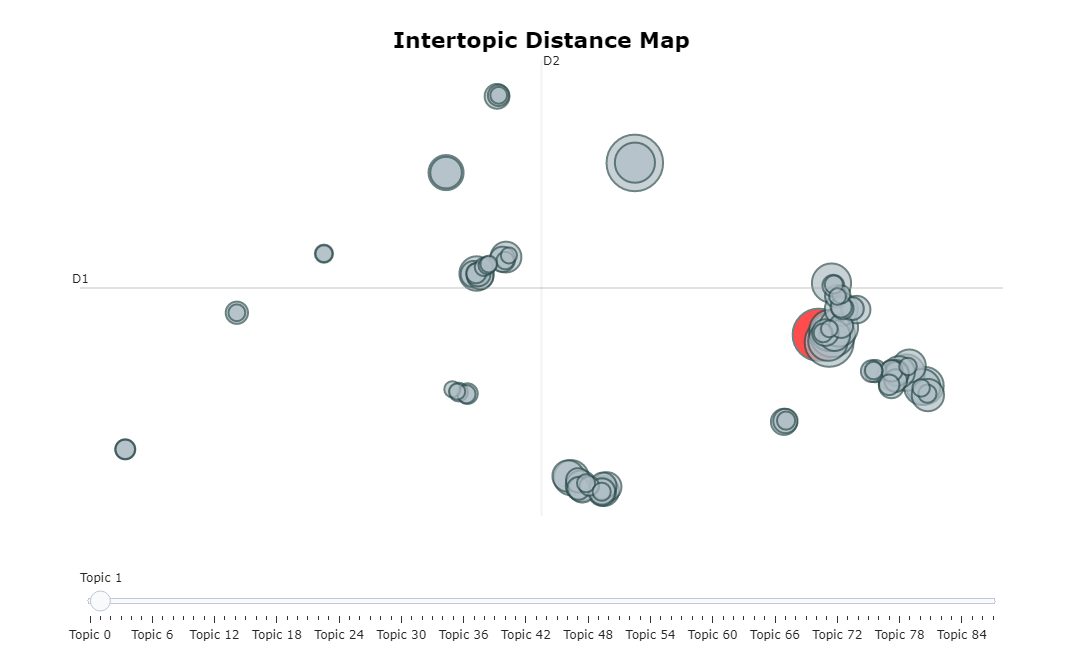

In [379]:
topic_model.visualize_topics()

<p style="color:red;">Visualize_documents(docs)</p>

<p>As parameter we decided to use the string stored in the variable <a href="#poems_and_songs"><code>poems_and_songs</code></a>, used also before, containing all the 9 poems and all the 9 songs taken into account, but before we used the function <code>preprocess(text)</code> already introduced to remove the punctuation and to transform all the characters in lowercase ones.</p>

In [374]:
verses_poems_and_songs = poems_and_songs.split("\n")

In [375]:
#application of the function preprocess(text) to our corpus 
poems_and_songs_no_punct=[]
for x in verses_poems_and_songs:
    x_preprocessed=preprocess(x)
    poems_and_songs_no_punct.append(x_preprocessed)

In [380]:
fig3= topic_model.visualize_documents(poems_and_songs_no_punct)

In [377]:
fig3.write_html("file3.html")

<p>The result can be consulted <a href="file3.html">here</a></p>

<p style="color:red;">Visualize heatmap()</p>

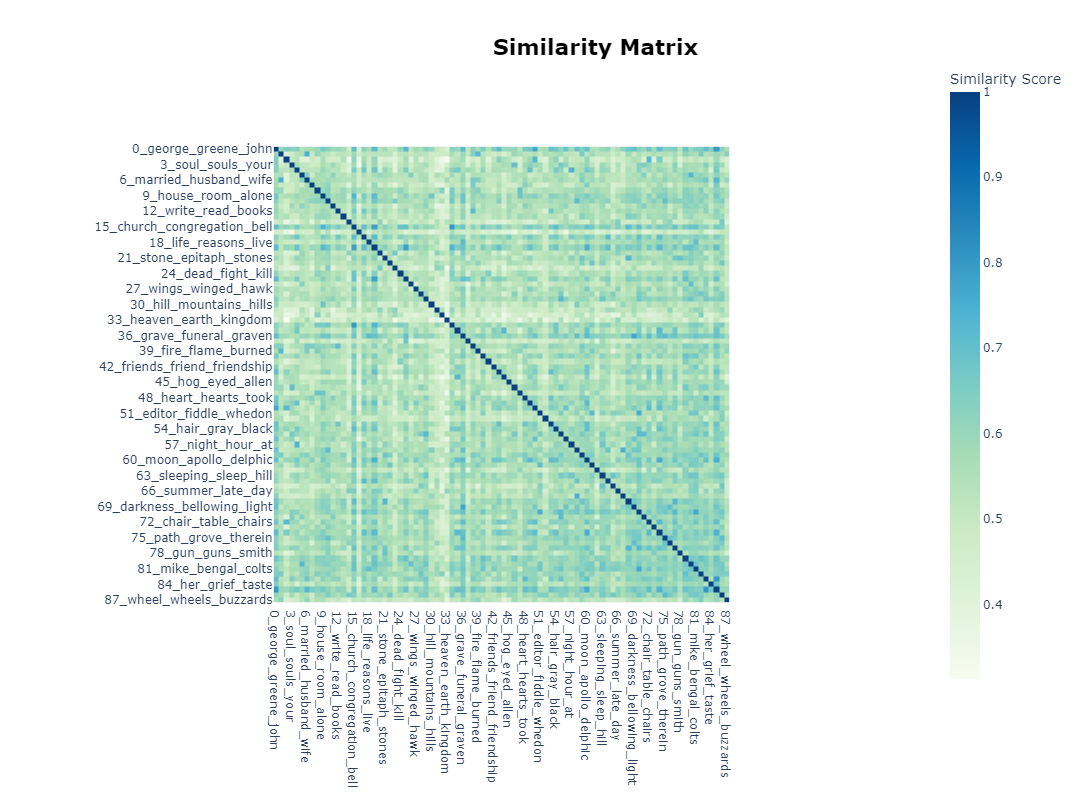

In [ ]:
topic_model.visualize_heatmap()

<p style="color:red;">Some considerations that can be done through these tools</p>

<p>These different topics' visualizations can be exploited to make further considerations about the similarity of the songs' and poems' texts.<br/> 
For instance, looking at the results that we obtained for the couple "Un malato di cuore" (De André's song) - "Francis Turner (Masters' poem) we can notice that just the topic 43 is shared by the two texts. So without any further information, we could conclude that maybe the two texts are not so similar as we expected. But before we should check the topics' similarity.</p>
<p><ul>
    <li>"Un malato di cuore" -> [48, 3, 43, 56, 16] </li>
    <li>"Francis Turner" -> [32, 71, 25, 77, 43]</li>
    </ul></p>

<img src="malato_di_cuore.png">

<p>From this picture we can see that the topics 3, 56, 16, 43, 48 are very close, so we can say that they belong to the same class, the one of the soul/spirit and suffering, and it is interesting the fact that they all come from the song (just the 43 is present also in the poem), so it seems that Fabrizio De André decided to highlight this topic that was already present in the original poem, but with a minor emphasis. 

<p>Through the use of these tools is also possible to see whether De André has been inspired also from other poems, it can be done by checking if the topics found in the 9 songs are present also in other texts of the Spoon River Anthology.</p>

<p>For instance, we could be interested in knowing where the topic 2, that is one of the most widely spread topic in the "Spoon River" Anthology and that seems to be the main topic treated in the song "Un ottico", can be found among all the texts of the anthology.<br/>
This can be done through the use of the method <a href="https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.get_representative_docs"><code>get_representative_docs(topic=None)</code></a> that extract representative documents, verses in our case, for the specified topic.</p>

In [382]:
representative_docs = topic_model.get_representative_docs(2)

In [383]:
representative_docs

['soft toned words searching eyes',
 'its garish cover luring eye',
 'hosts law order his eyes']

<p>If we search for these verses inside the Spoon River Anthology we find out that the first one belongs to the poem "Harlan Sewall", that talks about a suffered separation, the second to the poem "Alfred Moir", where the main character avoids the tempations of life because he has been captured by a book, and the last to "The Spooniad". Supposedly written by Jonathan Swift Somers, The Spooniad is an unfinished—indeed, barely begun—epic about Spoon River's history and it is the last component of the anthology. <br>
These are just suggestions, but if investigated more, we think that they could be useful to draw some conclusions on the De André influences and on the connection of the music album with the anthology poems. 